In [1]:
# Importing all the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the application csv file
df = pd.read_csv('application_data.csv')

In [3]:
# To view all the columns at once
pd.set_option('display.max_columns',130)

In [4]:
df.shape   # 307511 records, 122 columns

(307511, 122)

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Applications Data

## Data Cleaning 
### 1. Missing values

In [8]:
(df.isna().sum() > 0).sum()   # 67 columns have missing values

67

In [9]:
# Check the columns having some %age of missing values 
df.columns [ ( (df.isna().sum() / df.shape[0]) * 100) > 0 ] 

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

**Building Related Columns**

In the above columns, there are some columns that are related to the building where client lives. 
These are not relevant for our analysis. 

`Drop building related columns`

In [10]:
df = df.drop(columns=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'])

**AMT_ANNUITY**

In [11]:
# Calculating %age of rows with AMT_ANNUITY as null
df.AMT_ANNUITY.isna().sum() / df.shape[0] * 100

0.003902299429939092

In [12]:
df [ df.AMT_ANNUITY.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,NaN,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.626896,0.372334,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,NaN,0.727274,0.468660,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,NaN,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.885980,0.738370,0.452534,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,NaN,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.336803,0.566316,0.220095,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,4.0,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.647350,0.583947,0.177704,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,8.0,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.339389,0.667564,0.425893,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,2.0,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.682126,0.154811,0.297087,0.0,0.0,0.0,0.0,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,92

In [13]:
# Only 0.0039 % of records have NA values. We can easily drop these rows. Our analysis will remain unaffected.
df = df [~ df.AMT_ANNUITY.isna()]

**AMT_GOODS_PRICE**

In [14]:
# Calculating %age of rows with AMT_GOODS_PRICE as null
df.AMT_GOODS_PRICE.isna().sum() / df.shape[0] * 100

0.09040679807088804

In [15]:
# 0.0904 % of records have NA values. We can easily drop these rows. Our analysis will remain unaffected.
df = df [ ~df.AMT_GOODS_PRICE.isna()]

In [16]:
df.AMT_GOODS_PRICE.isna().sum()

0

**NAME_TYPE_SUITE** 
_( Nominal Categorical Variable)_

In [17]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [18]:
df.NAME_TYPE_SUITE.isna().sum()      # 1014 records have  NAME_TYPE_SUITE as null.

1014

In [19]:
df.NAME_TYPE_SUITE.mode()[0]    
# The maximum clients (mode) that applied for the loan are **Unaccompanied**
# I can assume that 1014 records that have NA in this field, also belonged to Unaccompanied category. 

'Unaccompanied'

`Imputation of NA values with Mode for NAME_TYPE_SUITE column`

In [20]:
df.NAME_TYPE_SUITE = df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0])

In [21]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249529
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**OWN_CAR_AGE**

In [22]:
# The count of NA values for car age
df.OWN_CAR_AGE.isna().sum()

202642

`Why the car age values are null? `

May be the client does not have a car. To check this, there is a flag **FLAG_OWN_CAR** 

In [23]:
# Analysing the flag FLAG_OWN_CAR associated with car age. 
df [ df.OWN_CAR_AGE.isna() ].FLAG_OWN_CAR.value_counts()

N    202637
Y         5
Name: FLAG_OWN_CAR, dtype: int64

In [24]:
# OWN_CAR_AGE is null, because many clients did not own a car. (Meaningful Missing)
# So, the NA values for column OWN_CAR_AGE are not missing. They are correct.
# But the 5 clients have the car but the age of car is NA. So these 5 records can be dropped as they have missing data.

In [25]:
# Dropping the records that own a car but do not have car age.
df = df [ ~( (df.FLAG_OWN_CAR == 'Y') & (df.OWN_CAR_AGE.isna()) ) ]

In [26]:
# For the clients that do not have car, we can impute -999.
df.OWN_CAR_AGE = df.OWN_CAR_AGE.fillna(-999)    

In [27]:
df.OWN_CAR_AGE.value_counts()

-999.0    202637
 7.0        7424
 6.0        6382
 3.0        6370
 8.0        5886
           ...  
 57.0          1
 69.0          1
 50.0          1
 47.0          1
 52.0          1
Name: OWN_CAR_AGE, Length: 63, dtype: int64

**OCCUPATION_TYPE**

In [28]:
df.OCCUPATION_TYPE.value_counts().sort_values(ascending = False)

Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21346
Drivers                  18588
High skill tech staff    11370
Accountants               9800
Medicine staff            8526
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

In [29]:
df.OCCUPATION_TYPE.isna().sum()

96333

- The maximum clients (mode) that applied for the application are Laborers
- There are a large number of records i.e. 96333 records with occupation as NA. These records cannot be 
dropped as we are at risk of loosing data
- The counts for the Laborers is even less than the NA values. So it wont make sense, imputing the NA values with Laborers 

`Create a separate category 'Missing' for NA values in OCCUPATION_TYPE column.`

In [30]:
df.OCCUPATION_TYPE = df.OCCUPATION_TYPE.fillna('Missing')

**EXT_SOURCE_1 , EXT_SOURCE_2, EXT_SOURCE_3**
_( Important columns containing credit scores)_

In [31]:
# Calculating the %age of records with missing values for EXT_SOURCE_1 column
df['EXT_SOURCE_1'].isna().sum() / df.shape[0] * 100    # 56% of the records have missing value for EXT_SOURCE_1

56.38671162960263

 `As the %age of missing value for EXT_SOURCE_1 is huge, rather than dropping the rows, we can leave the NA values as it is, instead of imputation. The NA values will not interfere with an statistical analysis.`

In [32]:
# Calculating the %age of records with missing values for EXT_SOURCE_2 column
df['EXT_SOURCE_2'].isna().sum() / df.shape[0] * 100    # 0.21% of the records have missing value for EXT_SOURCE_1

0.21450705692411853

`As the %age of records with missing value for EXT_SOURCE_2 is small, the missing values can be dropped`

In [33]:
df = df [ ~df.EXT_SOURCE_2.isna() ]

In [34]:
# Checking the %age of NA values in EXT_SOURCE_3
df.EXT_SOURCE_3.isna().sum() / df.shape[0] * 100   #Almost 20% of records have missing value for EXT_SOURCE_3. 

19.789468190254993

 `As the %age of missing value for EXT_SOURCE_3 is significant amount, rather than dropping the rows, we can leave NA values as it is, instead of imputation. The NA values will not interfere with an statistical analysis.`

**OBS_30_CNT_SOCIAL_CIRCLE**

In [35]:
# Checking the %age of NA values in OBS_30_CNT_SOCIAL_CIRCLE
df.OBS_30_CNT_SOCIAL_CIRCLE.isna().sum() / df.shape[0] * 100    #0.33% records have missing values for OBS_30_CNT_SOCIAL_CIRCLE

0.3317490711352212

In [36]:
# The %age of null values is very less, we can drop these records as it wont impact analysis.
df = df [ ~df.OBS_30_CNT_SOCIAL_CIRCLE.isna() ]

**Credit Bureau Enquiry Coulmns**

In [37]:
# Checking the remaining Bureau Enquiry columns with NA values excluding EXT_SOURCE_1 and EXT_SOURCE_3 
enquiryCols = pd.Series ( df.isna().sum() / df.shape[0] * 100, index = df.columns [ df.isna().sum() > 0 ][2:])
enquiryCols

AMT_REQ_CREDIT_BUREAU_HOUR    13.474831
AMT_REQ_CREDIT_BUREAU_DAY     13.474831
AMT_REQ_CREDIT_BUREAU_WEEK    13.474831
AMT_REQ_CREDIT_BUREAU_MON     13.474831
AMT_REQ_CREDIT_BUREAU_QRT     13.474831
AMT_REQ_CREDIT_BUREAU_YEAR    13.474831
dtype: float64

In [38]:
# Since the amount of missing values for enquiry columns is same, lets check the records having Bureau Enquiry columns as null

df [ df.AMT_REQ_CREDIT_BUREAU_HOUR.isna() | df.AMT_REQ_CREDIT_BUREAU_DAY.isna() | df.AMT_REQ_CREDIT_BUREAU_WEEK.isna() | df.AMT_REQ_CREDIT_BUREAU_MON.isna() | 
   df.AMT_REQ_CREDIT_BUREAU_QRT.isna() | df.AMT_REQ_CREDIT_BUREAU_YEAR.isna() ]

# For 41171 records, all of the enquiry columns have NA values

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,-999.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,-999.0,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,NaN,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,-999.0,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.721940,0.642656,NaN,0.0,0.0,0.0,0.0,-188.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-9776,-191,-4143.0,-2427,-999.0,1,1,0,1,0,0,Laborers,3.0,2,2,MONDAY,10,0,0,0,1,1,0,Construction,NaN,0.683513,NaN,4.0,0.0,4.0,0.0,-2811.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-18252,-4286,-298.0,-1800,7.0,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.565655,0.113375,NaN,0.0,0.0,0.0,0.0,-296.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Rented apartment,0.032561,-12847,-328,-2531.0,-35,1.0,1,1,0,1,1,1,Managers,2.0,1,1,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.739703,NaN,0.0,0.0,0.0,0.0,-1578.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,Unaccompanied,Commercial associate,Secondary / se

`Why all the credit bureau enquiry columns are null for these records?`

The reason may be that no enquiry for made to the credit bureau for those clients (Meaningful missing)

`To denote, the records with no credit enquiry, we can Impute the missing values with 999`

In [39]:
df.AMT_REQ_CREDIT_BUREAU_HOUR = df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(999)
df.AMT_REQ_CREDIT_BUREAU_DAY = df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(999)
df.AMT_REQ_CREDIT_BUREAU_WEEK = df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(999)
df.AMT_REQ_CREDIT_BUREAU_MON = df.AMT_REQ_CREDIT_BUREAU_MON.fillna(999)
df.AMT_REQ_CREDIT_BUREAU_QRT = df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(999)
df.AMT_REQ_CREDIT_BUREAU_YEAR = df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(999)

In [40]:
df.columns [ df.isna().sum()>0]

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3'], dtype='object')

As observed above, the columns EXT_SOURCE_1 and EXT_SOURCE_3 represent the credit scores that may have impact the client defaulter tendency. Since dropping the NA values may lead to loss of data. We have kept the NA values as it is. The NA values will not impact our statistical analysis 

### 2. Incorrect value handling

**CODE_GENDER**

In [41]:
df.CODE_GENDER.value_counts() 

F      201095
M      104441
XNA         4
Name: CODE_GENDER, dtype: int64

In [42]:
#There is no Gender as 'XNA'. It is incorrect value. 
# Drop these records with XNA gender.
df = df [~ (df.CODE_GENDER == 'XNA')]

**ORGANIZATION_TYPE**

In [43]:
df.ORGANIZATION_TYPE.unique() 

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [44]:
#There is no organisation as 'XNA'. It is incorrect value. Checking records with XNA organisation type.
df [df.ORGANIZATION_TYPE == 'XNA']    

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,-999.0,1,0,0,1,0,0,Missing,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587334,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,-999.0,1,0,0,1,1,0,Missing,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.722044,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,-999.0,1,0,0,1,1,0,Missing,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,NaN,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,-23920,365243,-9817.0,-4969,-999.0,1,0,0,1,1,0,Missing,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,NaN,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,-23548,365243,-5745.0,-4576,-999.0,1,0,0,1,0,0,Missing,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,NaN,0.766138,0.684828,0.0,0.0,0.0,0.0,-491.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,-22414,365243,-11976.0,-4171,-999.0,1,0,0,1,0,0,Missing,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,NaN,0.195625,0.360613,11.0,2.0,11.0,0.0,-1667.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,-24911,365243,-

Large amount of records with XNA organization type, these cannot be dropped.

`We can create a separate 'Missing' category, instead of XNA`

In [45]:
df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.replace('XNA','Invalid')

### 3. Checking datatype of columns

In [46]:
#pd.set_option('display.max_rows',100)
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 75, dtype: object

`Converting the number columns from float to int`

In [47]:
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.astype(int) 
df.OWN_CAR_AGE = df.OWN_CAR_AGE.astype(int) 
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.astype(int) 
df.OBS_30_CNT_SOCIAL_CIRCLE = df.OBS_30_CNT_SOCIAL_CIRCLE.astype(int) 
df.DEF_30_CNT_SOCIAL_CIRCLE = df.DEF_30_CNT_SOCIAL_CIRCLE.astype(int) 
df.OBS_60_CNT_SOCIAL_CIRCLE = df.OBS_60_CNT_SOCIAL_CIRCLE.astype(int) 
df.DEF_60_CNT_SOCIAL_CIRCLE = df.DEF_60_CNT_SOCIAL_CIRCLE.astype(int) 
df.DAYS_LAST_PHONE_CHANGE = df.DAYS_LAST_PHONE_CHANGE.astype(int) 
df.AMT_REQ_CREDIT_BUREAU_HOUR = df.AMT_REQ_CREDIT_BUREAU_HOUR.astype(int) 
df.AMT_REQ_CREDIT_BUREAU_DAY = df.AMT_REQ_CREDIT_BUREAU_DAY.astype(int) 
df.AMT_REQ_CREDIT_BUREAU_WEEK = df.AMT_REQ_CREDIT_BUREAU_WEEK.astype(int) 
df.AMT_REQ_CREDIT_BUREAU_MON = df.AMT_REQ_CREDIT_BUREAU_MON.astype(int) 
df.AMT_REQ_CREDIT_BUREAU_QRT = df.AMT_REQ_CREDIT_BUREAU_QRT.astype(int) 
df.AMT_REQ_CREDIT_BUREAU_YEAR = df.AMT_REQ_CREDIT_BUREAU_YEAR.astype(int) 

### 4. Checking Outliers

In this section, I have removed the outliers that were very much likely to distort my analysis and at the same time, preserved the outlier records that were large in number and would result in loss of data if removed. 

In [48]:
# There are some columns like AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, etc. that have the floating numbers 
# But in descibe they are shown in exponential form

# To avoid the exponential form, setting the display format to 3 decimal places with , separator to easily read the values
pd.set_option('display.float_format','{:,.3f}'.format)

In [49]:
sns.set_theme(style="whitegrid")  #Setting theme for box plots

**CNT_CHILDREN**

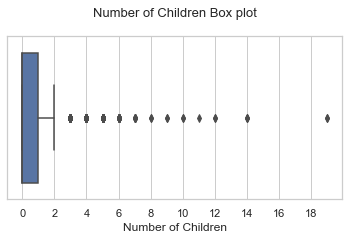

In [50]:
plt.figure(figsize=[6,3])
sns.boxplot(df.CNT_CHILDREN)
plt.xlabel('Number of Children')
plt.xticks(range(0,20,2))
plt.title('Number of Children Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [51]:
# The box plot inter-quartile range ranges from 0 to 2. Most of the clients have 0,1 or 2 children. 
# There are a few points who have more than 5 children and deviate from the general trend. These are OUTLIERS.

df = df [ ~(df.CNT_CHILDREN > 5)] 

**AMT_INCOME_TOTAL**

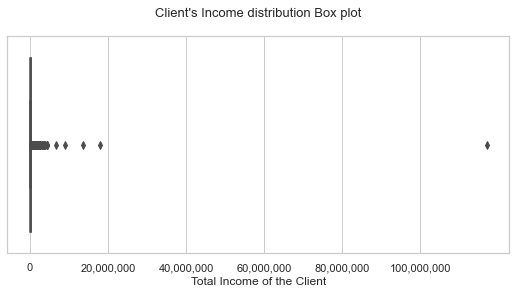

In [52]:
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_INCOME_TOTAL)
plt.xlabel('Total Income of the Client')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,120000000, 20000000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Income distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [53]:
# The IQR is very narrow (almost like a line). Most of the people have incomes till 10 Million. 
# There are some records that have extremely high income. These type of people will be very rare. 
# These are outliers for AMT_INCOME_TOTAL column and they may impact our statistical and visual analysis.

df = df [ ~(df.AMT_INCOME_TOTAL > 10000000)]     # Removing these records 

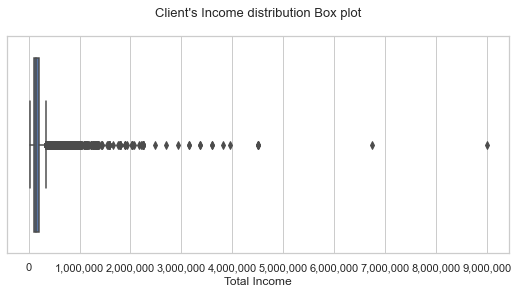

In [54]:
# Checking the column again for outliers.
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_INCOME_TOTAL)
plt.xlabel('Total Income')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,10000000, 1000000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Income distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

- Still there are large number of outliers. Most people have income less than 1 Million (or more precisely, less than 5 Lakhs).

In [55]:
df = df [ ~(df.AMT_INCOME_TOTAL > 1000000)]     # Removing the records greater than 1 Million

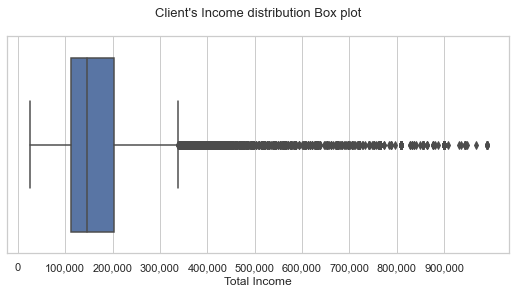

In [56]:
# Checking the column again for outliers.
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_INCOME_TOTAL)
plt.xlabel('Total Income')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,1000000,100000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Income distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

- Still large number of outliers present.
- Rather than dropping all these records,it is better to consider `75th / 80th percentile for AMT_INCOME_TOTAL` analysis

**AMT_CREDIT**

In [57]:
df.AMT_CREDIT.describe()

count     305,250.000
mean      599,643.552
std       402,143.657
min        45,000.000
25%       270,000.000
50%       517,500.000
75%       808,650.000
max     4,050,000.000
Name: AMT_CREDIT, dtype: float64

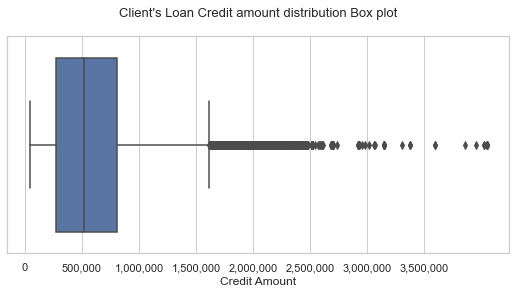

In [58]:
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_CREDIT)
plt.xlabel('Credit Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,4000000, 500000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Loan Credit amount distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [59]:
# The gap between min and I quartile is lesser as compared to gap between UPPER and III quartile.
# This indicates more number of clients have Credit amount from 8L to 16L (Upper fence).
# Beyond the upper fence, there are a large number of outliers.

df = df[ ~(df.AMT_CREDIT > 2000000)]   # Drop the records with Loan Credit Amount greater than 20L

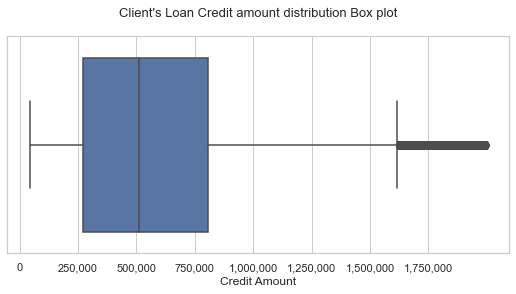

In [60]:
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_CREDIT)
plt.ticklabel_format(style='plain',axis = 'x')
plt.xlabel('Credit Amount')
xtick = range(0,2000000,250000)

plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])

plt.title('Client\'s Loan Credit amount distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

Still outliers are present.
Rather than dropping all these records,it is better to consider `75th / 80th percentile for AMT_CREDIT` analysis

**AMT_ANNUITY**

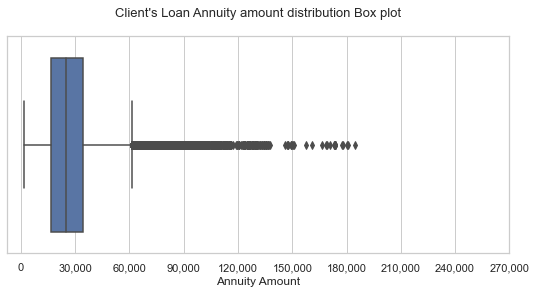

In [61]:
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_ANNUITY)
plt.xlabel('Annuity Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,300000,30000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Loan Annuity amount distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [62]:
df.AMT_ANNUITY.quantile(0.75) - df.AMT_ANNUITY.quantile(0.25)

17887.5

In [63]:
# There are huge number of outliers in this column.
# Almost 50% of the clients have to pay annuity ranging from 20K to 40K 
# Many people have large annuity amount i.e. greater than 40K and less than 60K.

In [64]:
df = df[~(df.AMT_ANNUITY > 140000)]    

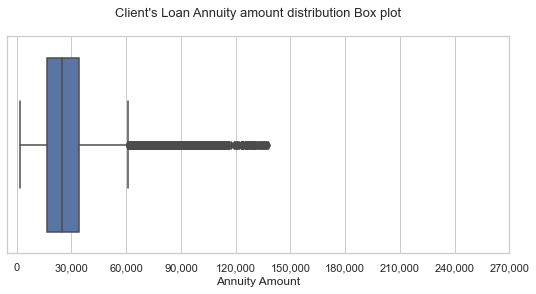

In [65]:
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_ANNUITY)
plt.xlabel('Annuity Amount')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,300000,30000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Client\'s Loan Annuity amount distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

`Many outliers are still present. Better to retain these records as we may risk loosing some important data. We can consider 75th / 80th percentile for AMT_ANNUITY analysis`

**AMT_GOODS_PRICE**

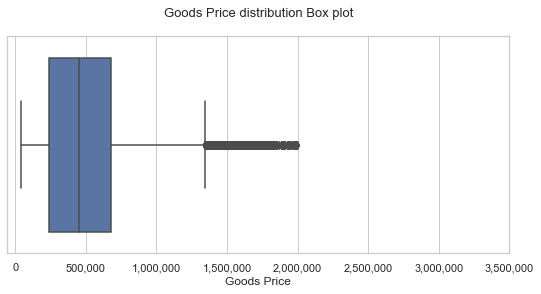

In [66]:
plt.figure(figsize=[9,4])

sns.boxplot(df.AMT_GOODS_PRICE)
plt.xlabel('Goods Price')
plt.ticklabel_format(style='plain',axis = 'x')
xtick = range(0,4000000,500000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.title('Goods Price distribution Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [67]:
# Large number of outliers are present. The Goods price for which client has applied for loan ranges from 0L to almost 15L.
# Since the gap between 75th percentile and upper fence is large, it indicates many people have applied for goods price within this range
df = df [ ~(df.AMT_GOODS_PRICE > 3000000)]     # Dropping the records greater than 30L

**DAYS_EMPLOYED**

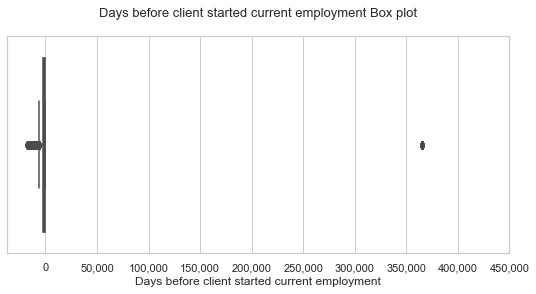

In [68]:
plt.figure(figsize=[9,4])
sns.boxplot(df.DAYS_EMPLOYED)
xtick = range(0,500000,50000)
plt.xticks(xtick, labels=['{:,}'.format(i) for i in xtick])
plt.xlabel('Days before client started current employment')
plt.title('Days before client started current employment Box plot\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

In [69]:
# Checking the records with days employed greater than 1,50,000
df[df.DAYS_EMPLOYED > 150000].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,"112,500.000","1,019,610.000","33,826.500","913,500.000",Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.019,-20099,365243,-7427,-3514,-999,1,0,0,1,0,0,Missing,2,2,2,WEDNESDAY,14,0,0,0,0,0,0,Invalid,0.587,0.206,0.752,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,100015,0,Cash loans,F,N,Y,0,"38,419.155","148,365.000","10,678.500","135,000.000",Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015,-20417,365243,-5246,-2512,-999,1,0,0,1,1,0,Missing,2,2,2,FRIDAY,7,0,0,0,0,0,0,Invalid,0.722,0.555,0.653,0,0,0,0,-2396,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
23,100027,0,Cash loans,F,N,Y,0,"83,250.000","239,850.000","23,850.000","225,000.000",Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006,-24827,365243,-9012,-3684,-999,1,0,0,1,1,0,Missing,2,3,3,FRIDAY,12,0,0,0,0,0,0,Invalid,NaN,0.624,0.669,0,0,0,0,-795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
38,100045,0,Cash loans,F,N,Y,0,"99,000.000","247,275.000","17,338.500","225,000.000",Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006,-23920,365243,-9817,-4969,-999,1,0,0,1,1,0,Missing,2,2,2,FRIDAY,11,0,0,0,0,0,0,Invalid,NaN,0.651,0.752,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
43,100050,0,Cash loans,F,N,Y,0,"108,000.000","746,280.000","42,970.500","675,000.000",Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.011,-23548,365243,-5745,-4576,-999,1,0,0,1,0,0,Missing,1,2,2,WEDNESDAY,9,0,0,0,0,0,0,Invalid,NaN,0.766,0.685,0,0,0,0,-491,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [70]:
# Converting days employed (days) to years for better understanding
df[df.DAYS_EMPLOYED > 150000].DAYS_EMPLOYED // 365   # Divide by 365

8         1000
11        1000
23        1000
38        1000
43        1000
          ... 
307469    1000
307483    1000
307487    1000
307505    1000
307507    1000
Name: DAYS_EMPLOYED, Length: 54779, dtype: int64

In [71]:
# It is never possible that a person is employed for 1000 years.
# Removing the invalid data.
df = df[ ~(df.DAYS_EMPLOYED > 150000 )]

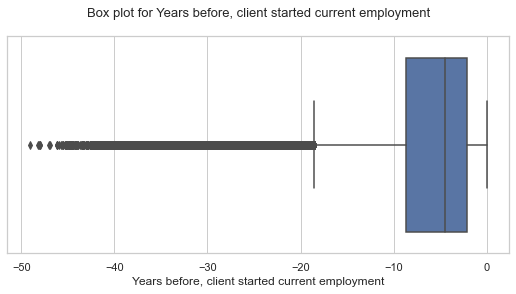

In [72]:
# Creating a box plot by converting days employed to (Years employed) by dividing by 365 
plt.figure(figsize=[9,4])
sns.boxplot(df.DAYS_EMPLOYED / 365) 
plt.xlabel('Years before, client started current employment')
plt.title('Box plot for Years before, client started current employment\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

- As per general trend, people have started their current employment just 0-20 years before.
- Talking about the points deviating from general trend, it is quite possible that there are people who did not change their 
employment from past 20-50 years.
- I will retain the points for now

**DAYS_REGISTRATION**

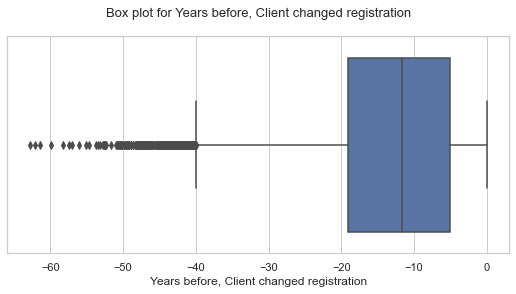

In [73]:
# Creating a box plot by converting days registered to (Years registered) by dividing by 365 
plt.figure(figsize=[9,4])
sns.boxplot(df.DAYS_REGISTRATION / 365) 
plt.xlabel('Years before, Client changed registration')
plt.title('Box plot for Years before, Client changed registration\n', fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

- As per general trend, people have changed their registration beween 0 to 40 years.
- There are people who are in their late 50s or old age. They have changed their registration 40-60 years before.


In [74]:
df = df [ df.DAYS_REGISTRATION/365 > -50 ]  # Retaining the records that have changed their registration between past 0-50 years

### 5. Checking duplicate rows

In [75]:
df.duplicated().sum()   # No duplicate rows

0

### 6. Creating new columns

- **DAYS_BIRTH** 
_( Client's age in days)_  => **AGE** 
_( Client's age in years)_ 

In [76]:
df['AGE'] = (df.DAYS_BIRTH // 365) * -1     # Multiplying by -1 for ease of understanding

# Drop DAYS_BIRTH column
df.drop('DAYS_BIRTH', axis = 1, inplace = True)

- **AGE** 
_( Client's age in years)_  => **AGE_GROUP**
_( Client's age group)_ 

In [77]:
# Create new column for storing the Age group of client

df['AGE_GROUP'] = pd.cut(df.AGE, bins= [0,20,30,40,50,60,70,999] , labels = ['0-20','20-30','30-40','40-50','50-60','60-70','>70'])

- **AMT_CREDIT** 
_( Credit amount of loan)_  ,  **AMT_ANNUITY** 
_( Installment/EMI amount)_ =>  **NUM_EMI** 
_( Number of EMIs)_ 

In [78]:
df['NUM_EMI'] = df['AMT_CREDIT'] // df['AMT_ANNUITY']

- **AMT_INCOME_TOTAL** 
_( Total Income)_   =>  **INCOME_CATEGORY** 
_( Categorical variable for Income)_



In [79]:
df['INCOME_CATEGORY'] = pd.cut(df['AMT_INCOME_TOTAL'], [0, 45000, 90000, 135000, 180000, 225000, 270000,99999999999], labels=['0-45K','45K-90K','90K-135K','135K-180K','180K-225K','225K-270K','>270K'])

- **HOUR_APPR_PROCESS_START** 
_(Hour at which client applied for loan)_   =>  **TIME_APPR_PROCESS_START** 
_( Time in AM, PM format)_

In [80]:
# Lambda function to convert the hours to AM, PM format
def timeFormat(x):
    if x == 0:
        return '12 AM'
    if x == 12:
        return '12 PM'
    elif x < 12:
        return str(x) + ' AM'
    else:
        return str(x - 12) + ' PM'

In [81]:
df['TIME_APPR_PROCESS_START'] = df.HOUR_APPR_PROCESS_START.apply(lambda x:  timeFormat(x))

- **DAYS_LAST_PHONE_CHANGE** 
_(Days before Client changed his phone)_   =>  **YEARS_LAST_PHONE_CHANGE** 
_( Years before Client changed his phone)_

In [82]:
df['YEARS_LAST_PHONE_CHANGE'] = df.DAYS_LAST_PHONE_CHANGE / 365 * -1    # Multiplying by -1 for ease of understanding

- **DAYS_EMPLOYED** 
_(Days before Client started his current employment)_   =>  **YEARS_EMPLOYED** 
_( Years before Client started his current employment)_

In [83]:
df['YEARS_EMPLOYED'] = df.DAYS_EMPLOYED / 365 * -1    # Multiplying by -1 for ease of understanding

- **DAYS_ID_PUBLISH** 
_(Days before Client chnaged Identity document)_   =>  **YEARS_ID_PUBLISH** 
_( Years before Client chnaged Identity document)_

In [84]:
df['YEARS_ID_PUBLISH'] = df.DAYS_ID_PUBLISH / 365 * -1    # Multiplying by -1 for ease of understanding

- **DAYS_REGISTRATION** 
_(Days before Client chnaged Registration)_   =>  **YEARS_REGISTRATION** 
_( Years before Client chnaged Registration)_

In [85]:
df['YEARS_REGISTRATION'] = df.DAYS_REGISTRATION / 365 * -1    # Multiplying by -1 for ease of understanding

## Univariate Analysis

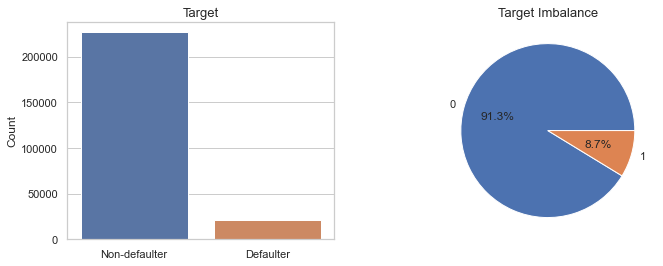

In [86]:
# TARGET

plt.figure(figsize=(11, 4))
plt.subplots_adjust(wspace = 0.3, hspace=0.8)

plt.subplot(1,2,1)
sns.countplot(df['TARGET'])
plt.xlabel('')
plt.ylabel("Count")
plt.title('Target',fontdict = {'fontsize': '13','fontweight': 5})
plt.xticks( [0,1], labels =['Non-defaulter','Defaulter'] ,rotation = None)


plt.subplot(1,2,2)
df['TARGET'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.ylabel("")
plt.title('Target Imbalance',fontdict = {'fontsize': '13','fontweight': 5})

plt.show() 

# The count of Clients who Defaulter are very less as compared to Non-defaulter clients.

**Check Imbalance** 

As observed from the plot above, the people who have defaulted are very less as compared to Non-defaulters. Thus, the data set is __Imbalanced__.

In [87]:
# IMBALANCE RATIO 

# No of Non-defaulter records / No of Defaulter records 
ImbalanceRatio = df[df.TARGET == 0].shape[0] / df[df.TARGET == 1].shape[0]
print(ImbalanceRatio)   

10.470954931658662


In [88]:
df.TARGET.value_counts(normalize=True)     

# 91.3% Non-defaulters, 8.7% Defaulters 
# Very less defaulters as compared to Non-defaulters, making the dataset IMBALANCED.

0   0.913
1   0.087
Name: TARGET, dtype: float64

**Categorical Columns**

In [89]:
# Finding categorical columns
categoricalCols = set(df.columns) - set(df.describe().columns)
categoricalCols = list(categoricalCols)
categoricalCols

['INCOME_CATEGORY',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'TIME_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AGE_GROUP',
 'OCCUPATION_TYPE']

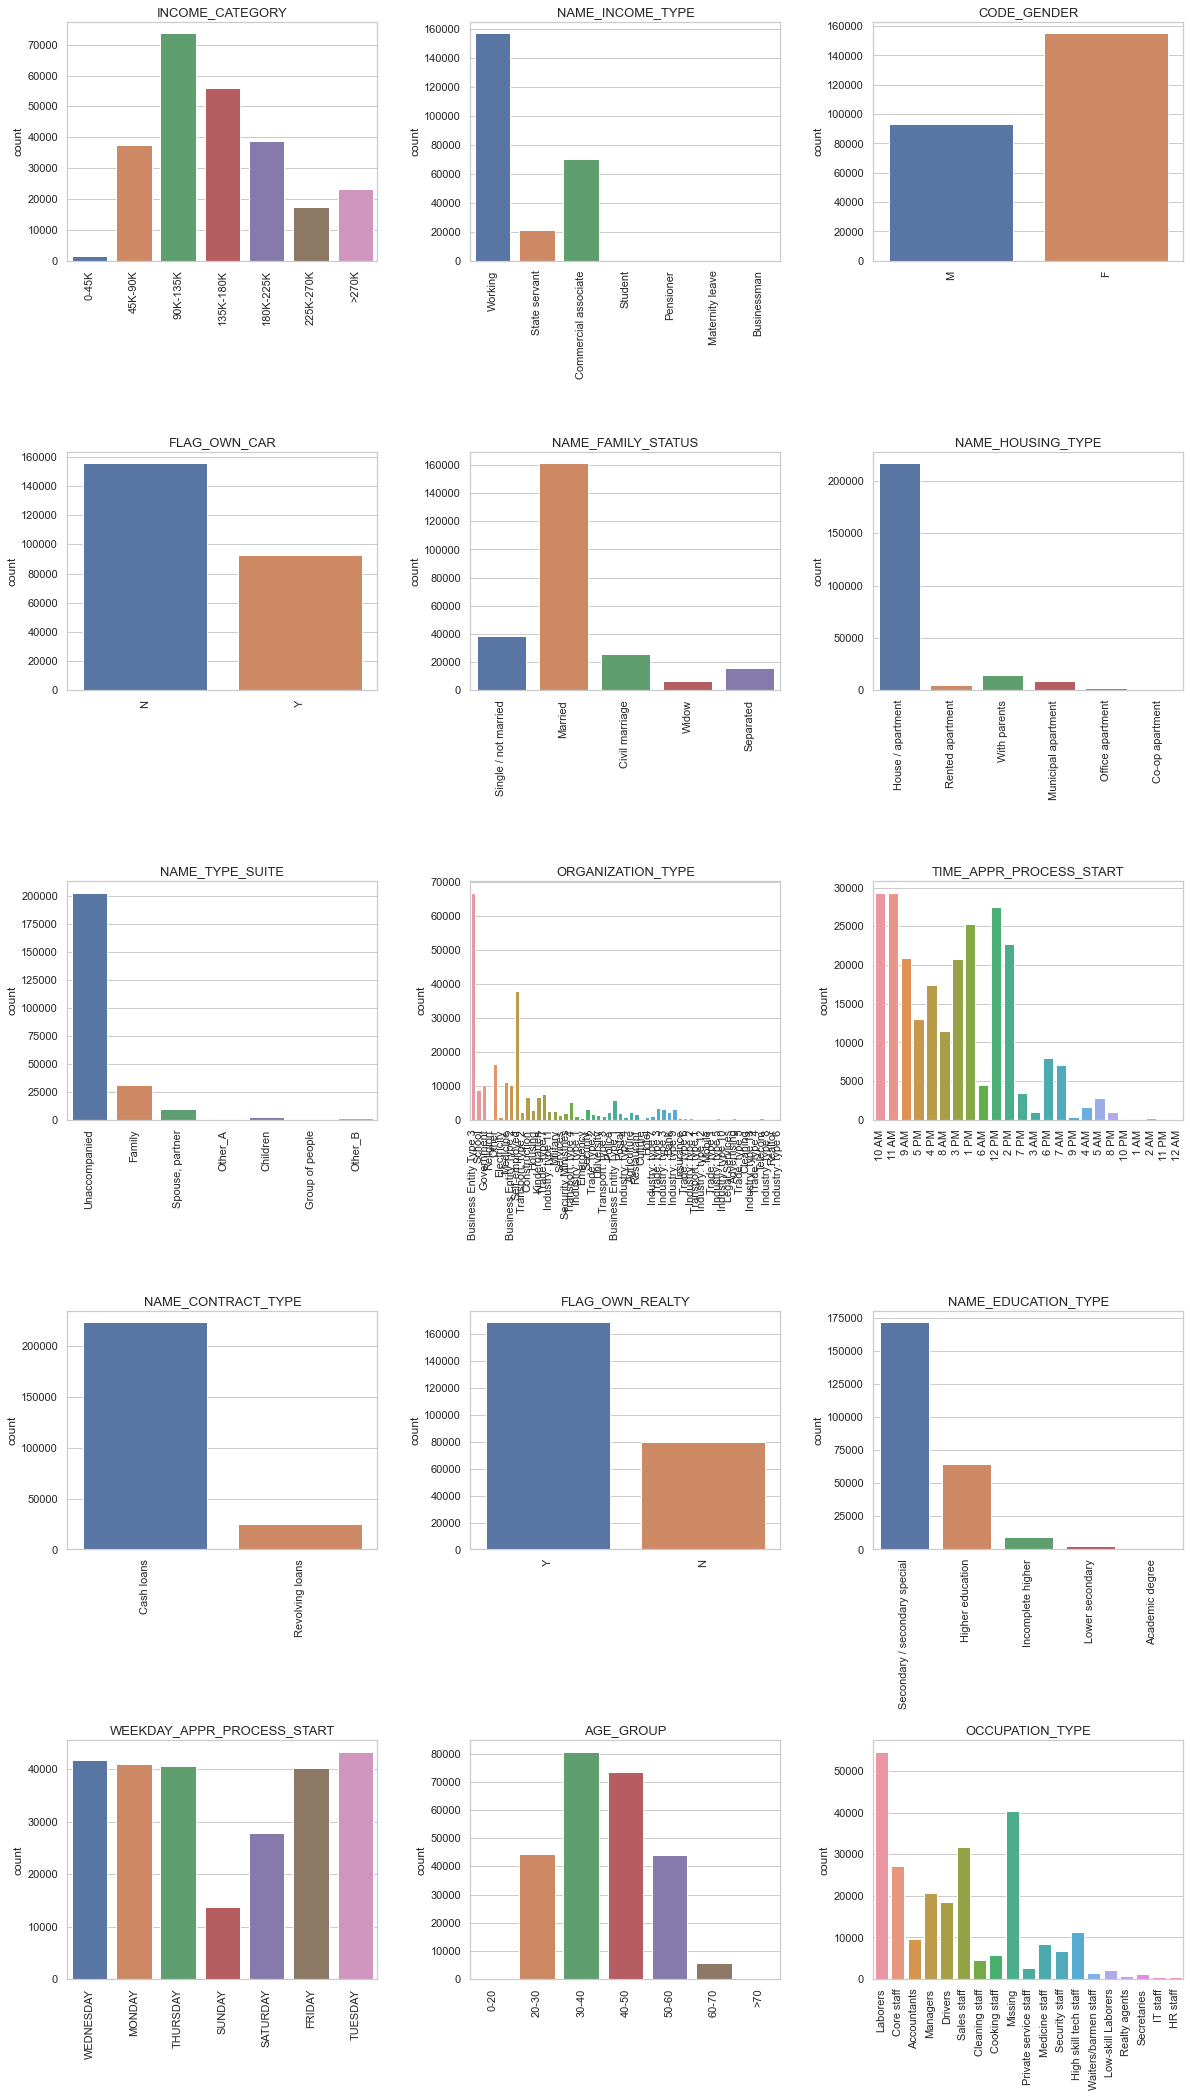

In [90]:
plt.figure(figsize=(20, 36))
plt.subplots_adjust(wspace = 0.3, hspace=0.8)
for index,i in enumerate(categoricalCols):
    plt.subplot(5,3,index+1)
    sns.countplot(df[i])
    plt.xlabel('')
    plt.xticks(rotation = 90)
    plt.title(i,fontdict = {'fontsize': '13','fontweight': 5})

- **NAME_HOUSING_TYPE:** Large chunk of clients have their own housing or flat. There are very few who live in rented or municipal apartment or with their parents.
- **TIME_APPR_PROCESS_START:** Most of the people have applied for loan in the normal working hours 9 AM to 6 PM. Maximum applications are at 10 AM and 11 AM. Before 9 AM and after 6 PM, very few clients have applied for loan.
- **CODE_GENDER:** There are more number of female loan applicants as compared to male applicants
- **NAME_CONTRACT_TYPE:** Most of the people have applied for Cash loans instead of Revolving loans.
- **OCCUPATION_TYPE:** Large amount of loan applicants are Labourers, follwed by Sales staff, followed by Core Staff and Managers 
- **NAME_FAMILY_STATUS:** Most of the applicants are married. Least applications come from the Widow category.
- **WEEKDAY_APPR_PROCESS_START:** Loan applications are almost same on all working days (Mon to Fri) just slightly higher on Tuesday. For weekends, more applicants applied on Saturday as compared to Sunday.
- **NAME_INCOME_TYPE:** Maximum number of loan applicants are working, followed by Commercial Associate, Pensioner or State Servant.
- **NAME_EDUCATION_TYPE:** Most of the loan applicants have secondary education, followed by higher education. While the least loan applicants have Academic, Incomplete higher or lower secondary education.
- **INCOME_CATEGORY**: Many clients have their total incomes in category 90K to 135K, followed by 135-180K. The least number of clients belong to the 0-45K Income category.
- **FLAG_OWN_CAR**: More number of clients do not own a car.
- **AGE_GROUP**: Majority of Clients belong to 30-40 or 40-50 years age group.
- **FLAG_OWN_REALTY**: Most of the clients have their own house/apartment. 
- **NAME_TYPE_SUITE:** Maximum number of loan applicants are not accompanied by anybody, some are accompanied by their family and a very few by their spouse






**ORGANIZATION_TYPE**

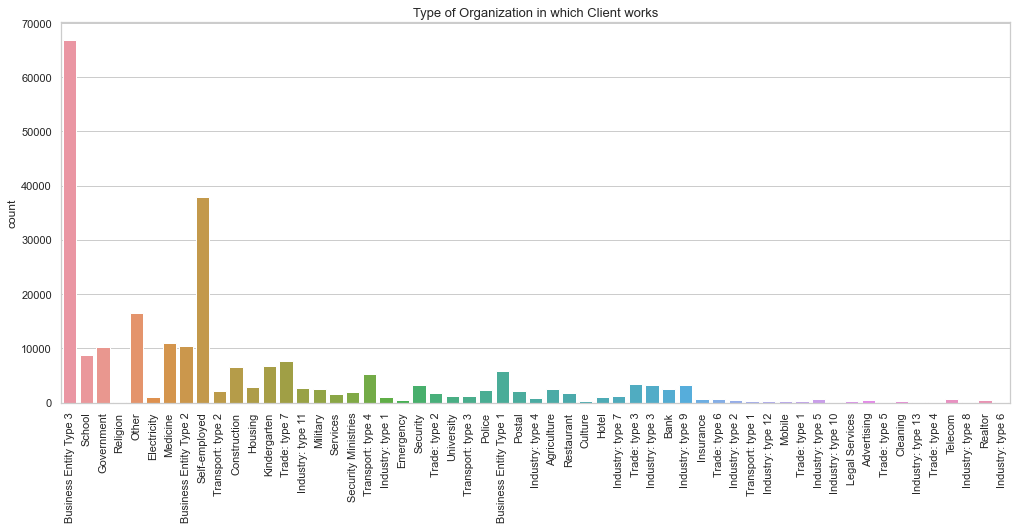

In [91]:
plt.figure(figsize=(17, 7))
sns.countplot(df['ORGANIZATION_TYPE'])
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('Type of Organization in which Client works',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()  

# Many loan applicants belong to Business Entity type 3 or Self employed.

**TIME_APPR_PROCESS_START** _(Time at which Client applied for Loan)_

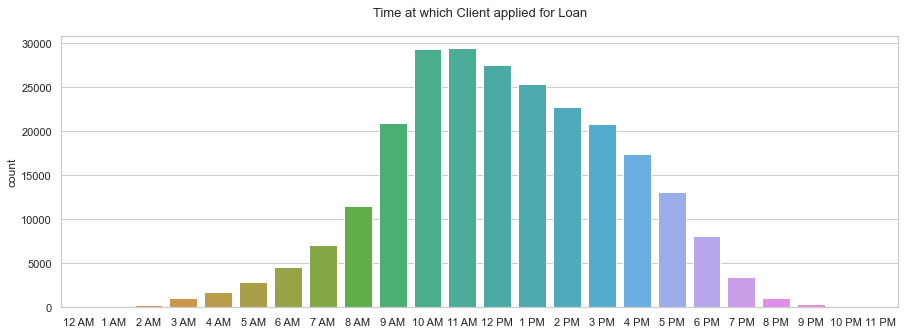

In [92]:
plt.figure(figsize=[15,5])
sns.countplot(df.TIME_APPR_PROCESS_START, order = ['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
                                                  '11 AM', '12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM',
                                                  '11 PM', ])
plt.title('Time at which Client applied for Loan\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.xlabel('')
plt.show()

- Most of the people have applied for loan in the normal working hours 9 AM to 6 PM. 
- Maximum applications are at 10 AM and 11 AM.
- Before 9 AM and after 6 PM, very few clients have applied for loan.

**CNT_CHILDREN**

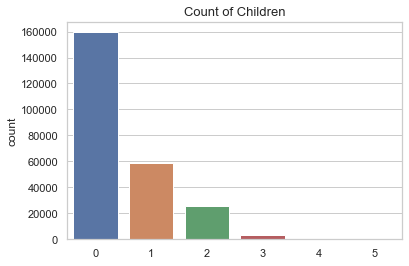

In [93]:
# CNT_CHILDREN
sns.countplot(df['CNT_CHILDREN'])
plt.xlabel('')
plt.title('Count of Children',fontdict = {'fontsize': '13','fontweight': 5})
plt.show() 

# Maximum number of Clients have 0 children, followed by 1 , 2 and 3 children.

**REGION_POPULATION_RELATIVE**

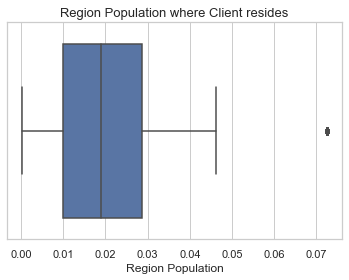

In [94]:
# REGION_POPULATION_RELATIVE
sns.boxplot(df['REGION_POPULATION_RELATIVE'])
plt.xlabel('Region Population')
plt.title('Region Population where Client resides',fontdict = {'fontsize': '13','fontweight': 5})
plt.xticks(rotation = None)
plt.show()         

# Almost 75% of the clients live in less populated regions i.e. below 0.03 Region population. 
# There are a few clients who live in densely populated regions with population greater than 0.07. 
# These clients deviate from the general trend and may have some impact on defaulting tendency. 
# So not removing these outliers for now.

**DAYS_ID_PUBLISH**

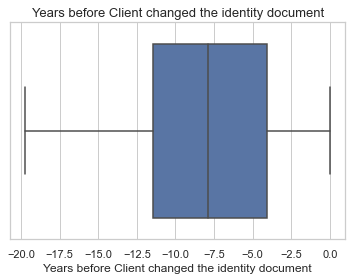

In [95]:
# DAYS_ID_PUBLISH
sns.boxplot(df['DAYS_ID_PUBLISH'] / 365)       # Converting days to years for easy interpretation
plt.xlabel('Years before Client changed the identity document')
plt.title('Years before Client changed the identity document',fontdict = {'fontsize': '13','fontweight': 5})
plt.xticks(rotation = None)
plt.show()   

# Clients changed their documents 0-20 years before the application. No outliers

**OWN_CAR_AGE**

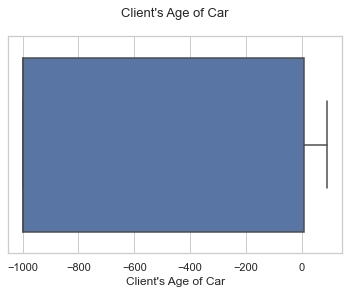

In [96]:
# OWN_CAR_AGE
sns.boxplot(df['OWN_CAR_AGE'] )       
plt.xlabel('Client\'s Age of Car')
plt.title('Client\'s Age of Car\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.xticks(rotation = None)
plt.show()  

**CNT_FAM_MEMBERS**

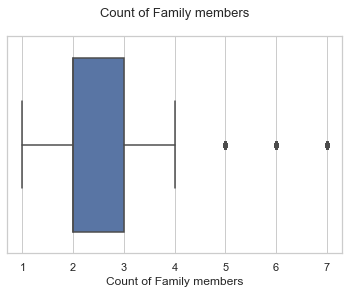

In [97]:
# CNT_FAM_MEMBERS
sns.boxplot(df['CNT_FAM_MEMBERS'] )       
plt.xlabel('Count of Family members')
plt.title('Count of Family members\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.xticks(rotation = None)
plt.show()  

# Most of the Clients have 1-4 family members. There are few clients wit 5,6 or 7 family members

**Mobile Email Flags**

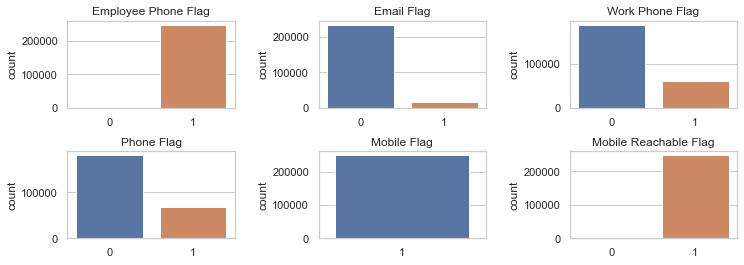

In [98]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

# FLAG_EMP_PHONE
plt.subplot(2,3,1)
sns.countplot(df['FLAG_EMP_PHONE'])
plt.xlabel('')
plt.title('Employee Phone Flag') 

# FLAG_EMAIL
plt.subplot(2,3,2)
sns.countplot(df['FLAG_EMAIL'])
plt.xlabel('')
plt.title('Email Flag') 

# FLAG_WORK_PHONE
plt.subplot(2,3,3)
sns.countplot(df['FLAG_WORK_PHONE'])
plt.xlabel('')
plt.title('Work Phone Flag') 

# FLAG_PHONE
plt.subplot(2,3,4)
sns.countplot(df['FLAG_PHONE'])
plt.xlabel('')
plt.title('Phone Flag') 

# FLAG_MOBIL
plt.subplot(2,3,5)
sns.countplot(df['FLAG_MOBIL'])
plt.xlabel('')
plt.title('Mobile Flag') 

# FLAG_CONT_MOBILE
plt.subplot(2,3,6)
sns.countplot(df['FLAG_CONT_MOBILE'])
plt.xlabel('')
plt.title('Mobile Reachable Flag')
 
plt.show()

**Employee Phone Flag** (FLAG_EMP_PHONE) : All of the Clients have provided their Employee phone. This column will not help us in identifying the defaulter and non defaulter. So, it is better to drop this column

**Email Flag** (FLAG_EMAIL) : A small number of people have provided their emails in the loan application. 

**Work Phone Flag** (FLAG_WORK_PHONE) : More than 2,00,000 clients have not provided their home phone. 

**Mobile Flag** (FLAG_MOBIL) , **Mobile Reachable Flag** (FLAG_CONT_MOBILE)
- All of the clients have provided their mobile phone and for most the clients phone was also reachable. 
- These columns will not help us in identifying the person who is likely to default. So, it is better to drop these columns.

In [99]:
# Dropping columns FLAG_MOBILE , FLAG_CONT_MOBILE, FLAG_EMP_PHONE
df = df.drop(columns=['FLAG_MOBIL' , 'FLAG_CONT_MOBILE','FLAG_EMP_PHONE'])

**Flag document columns**

Text(0.5, 1.0, 'Document 10 Flag')

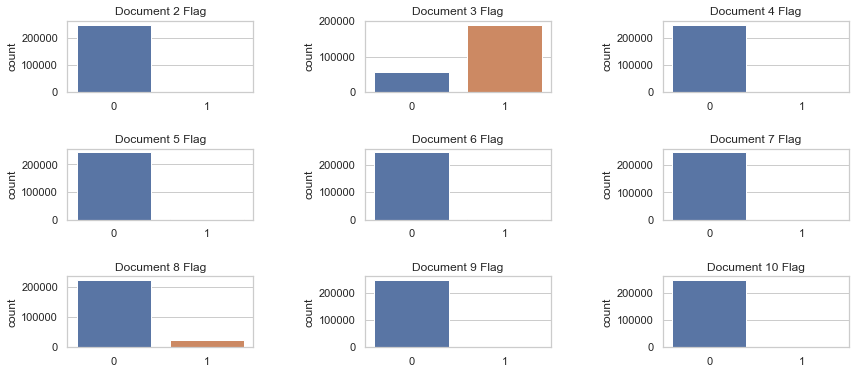

In [100]:
plt.figure(figsize=(14,6))
plt.subplots_adjust(wspace = 0.6, hspace=0.8)

# FLAG_DOCUMENT_2
plt.subplot(3,3,1)
sns.countplot(df['FLAG_DOCUMENT_2'])
plt.xlabel('')
plt.title('Document 2 Flag') 

# FLAG_DOCUMENT_3
plt.subplot(3,3,2)
sns.countplot(df['FLAG_DOCUMENT_3'])
plt.xlabel('')
plt.title('Document 3 Flag') 

# FLAG_DOCUMENT_4
plt.subplot(3,3,3)
sns.countplot(df['FLAG_DOCUMENT_4'])
plt.xlabel('')
plt.title('Document 4 Flag') 

# FLAG_DOCUMENT_5
plt.subplot(3,3,4)
sns.countplot(df['FLAG_DOCUMENT_5'])
plt.xlabel('')
plt.title('Document 5 Flag') 

# FLAG_DOCUMENT_6
plt.subplot(3,3,5)
sns.countplot(df['FLAG_DOCUMENT_6'])
plt.xlabel('')
plt.title('Document 6 Flag') 

# FLAG_DOCUMENT_7
plt.subplot(3,3,6)
sns.countplot(df['FLAG_DOCUMENT_7'])
plt.xlabel('')
plt.title('Document 7 Flag')

# FLAG_DOCUMENT_8
plt.subplot(3,3,7)
sns.countplot(df['FLAG_DOCUMENT_8'])
plt.xlabel('')
plt.title('Document 8 Flag') 

# FLAG_DOCUMENT_9
plt.subplot(3,3,8)
sns.countplot(df['FLAG_DOCUMENT_9'])
plt.xlabel('')
plt.title('Document 9 Flag') 

# FLAG_DOCUMENT_10
plt.subplot(3,3,9)
sns.countplot(df['FLAG_DOCUMENT_10'])
plt.xlabel('')
plt.title('Document 10 Flag')

`All of the Flag document columns have 0s except Document 3 and Document 8`. These columns are wont be of any use. They won't help us in differentiating people into defaulter or non-defaulter.
It will be better to drop these columns

In [101]:
df = df.drop(columns = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                   'FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                   'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                   'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'])

**Region Rating columns**

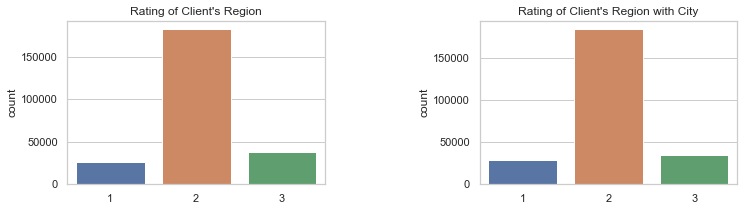

In [102]:
plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace = 0.6, hspace=0.8)

# REGION_RATING_CLIENT
plt.subplot(1,2,1)
sns.countplot(df['REGION_RATING_CLIENT'])
plt.xlabel('')
plt.title('Rating of Client\'s Region') 

# REGION_RATING_CLIENT_W_CITY
plt.subplot(1,2,2)
sns.countplot(df['REGION_RATING_CLIENT_W_CITY'])
plt.xlabel('')
plt.title('Rating of Client\'s Region with City')

plt.show()

# The plots for both the columns are very similar. 
# For majority of the clients, living region is given the rating of 2, followed by 3 and 1.

**Address Mismatch Columns**

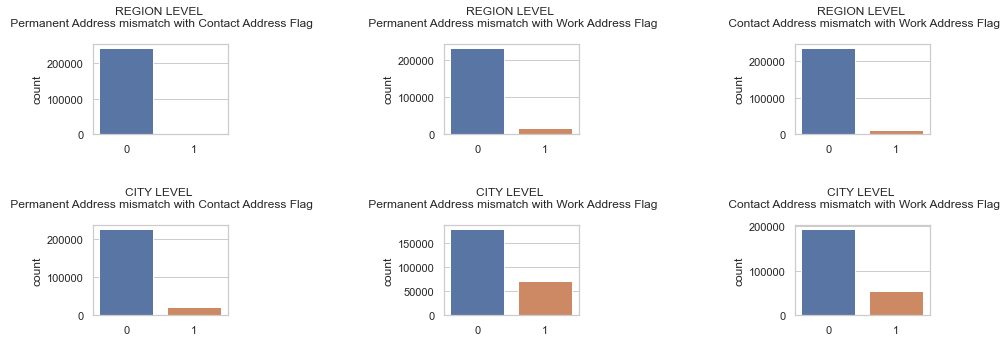

In [103]:
plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace = 1.6, hspace=1)

# REG_REGION_NOT_LIVE_REGION
plt.subplot(2,3,1)
sns.countplot(df['REG_REGION_NOT_LIVE_REGION'])
plt.xlabel('')
plt.title('REGION LEVEL \n Permanent Address mismatch with Contact Address Flag\n')

# REG_REGION_NOT_WORK_REGION
plt.subplot(2,3,2)
sns.countplot(df['REG_REGION_NOT_WORK_REGION'])
plt.xlabel('')
plt.title('REGION LEVEL \n Permanent Address mismatch with Work Address Flag\n')

# LIVE_REGION_NOT_WORK_REGION
plt.subplot(2,3,3)
sns.countplot(df['LIVE_REGION_NOT_WORK_REGION'])
plt.xlabel('')
plt.title('REGION LEVEL \n Contact Address mismatch with Work Address Flag\n')

# REG_CITY_NOT_LIVE_CITY
plt.subplot(2,3,4)
sns.countplot(df['REG_CITY_NOT_LIVE_CITY'])
plt.xlabel('')
plt.title('CITY LEVEL \n Permanent Address mismatch with Contact Address Flag\n')

# REG_CITY_NOT_WORK_CITY
plt.subplot(2,3,5)
sns.countplot(df['REG_CITY_NOT_WORK_CITY'])
plt.xlabel('')
plt.title('CITY LEVEL \n Permanent Address mismatch with Work Address Flag\n')

# LIVE_CITY_NOT_WORK_CITY
plt.subplot(2,3,6)
sns.countplot(df['LIVE_CITY_NOT_WORK_CITY'])
plt.xlabel('')
plt.title('CITY LEVEL \n Contact Address mismatch with Work Address Flag\n')

plt.show()

#---------------------------------------------------------------------------------------------------------------------
# REGION-LEVEL ADRESS MISMATCH
# First 3 plots have no/ minimal number of 1s for mismatch of address. 
# So, the Region Level mismatch flag will not help us in identification of defaulters. 

# CITY-LEVEL ADRESS MISMATCH
# There are significant amount of 1s indicating mismatch of address. This may be useful in identification of defaulters. 

**External Sources**

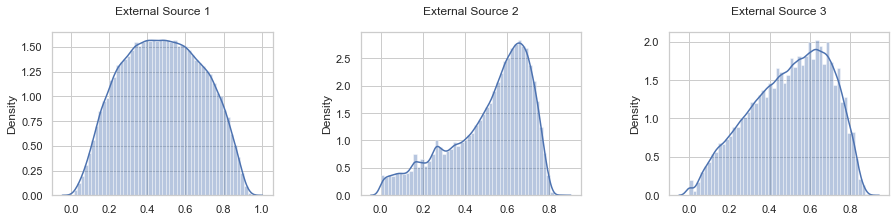

In [104]:
plt.figure(figsize=[15,3])
plt.subplots_adjust(wspace = 0.4, hspace=1.5)

# EXT_SOURCE_1
plt.subplot(1,3,1)
sns.distplot(df.EXT_SOURCE_1)
plt.xlabel('')
plt.title('External Source 1\n')

# EXT_SOURCE_2
plt.subplot(1,3,2)
sns.distplot(df.EXT_SOURCE_2)
plt.xlabel('')
plt.title('External Source 2\n')

# EXT_SOURCE_3
plt.subplot(1,3,3)
sns.distplot(df.EXT_SOURCE_3)
plt.xlabel('')
plt.title('External Source 3\n')

plt.show()

# EXT_SOURCE_1 gradually increases till between 0.4 to 0.6 and then decreases gradually
# EXT_SOURCE_2 increases till 0.6 and forms a steep peak and then decreases abruptly
# EXT_SOURCE_3 increases till 0.6-0.7 and then decreases much faster than pace

**Client Social Surroundings**

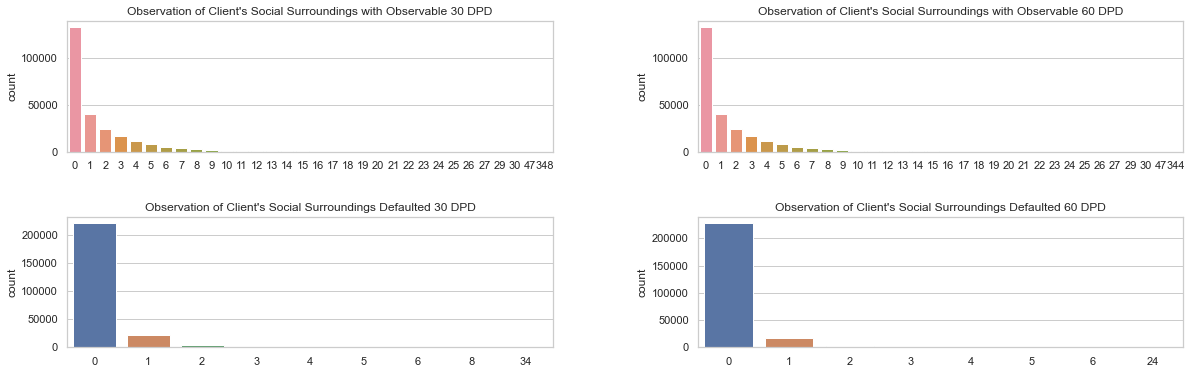

In [105]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)

# OBS_30_CNT_SOCIAL_CIRCLE
plt.subplot(2,2,1)
sns.countplot(df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.xlabel('')
plt.title('Observation of Client\'s Social Surroundings with Observable 30 DPD') 

# OBS_60_CNT_SOCIAL_CIRCLE
plt.subplot(2,2,2)
sns.countplot(df['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.xlabel('')
plt.title('Observation of Client\'s Social Surroundings with Observable 60 DPD') 

# DEF_30_CNT_SOCIAL_CIRCLE
plt.subplot(2,2,3)
sns.countplot(df['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.xlabel('')
plt.title('Observation of Client\'s Social Surroundings Defaulted 30 DPD') 


# DEF_60_CNT_SOCIAL_CIRCLE
plt.subplot(2,2,4)
sns.countplot(df['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.xlabel('')
plt.title('Observation of Client\'s Social Surroundings Defaulted 60 DPD') 

plt.show()

#----------------------------------------------------------------------------------------------------------------------------
# OBSERVABLE 30 DPD/ 60 DPD
# Number of Observations of Clients Social surroundings with Observable 30 DPD or 60 DPD has almost same counts. 
# Most of the Clients have 0 observations of Social surroundings with Observable 30 DPD / 60 DPD , followed by 1,2 and so on.

# DEFAULTED 30 DPD/ 60 DPD
# Number of Observations of Clients Social surroundings Defaulted 30 DPD or 60 DPD has almost same counts. 
# Most of the Clients have 0 observations of Social surroundings with Defaulted 30 DPD / 60 DPD , followed by 1,2 and so on.

**YEARS_LAST_PHONE_CHANGE**

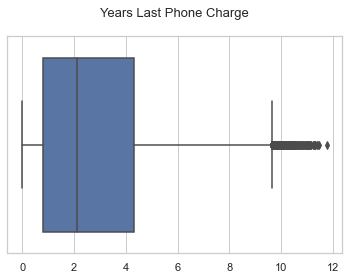

In [106]:
sns.boxplot(df['YEARS_LAST_PHONE_CHANGE'])       
plt.xlabel('')
plt.title('Years Last Phone Charge\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.xticks(rotation = None)
plt.show()  

# Most of the people have chnaged their mobile phones in the time period of last 10 years (from the day of application)
# Significant number of people have changed their phone 5-10 years back as suggested from 75th percentile and upper fence.
# OUTLIERS : There are a many people who changed their phone 10-12 years back. The people deviate from the general trend.

In [107]:
# Checking the records with outlier values for YEARS_LAST_PHONE_CHANGE column
df [ df['YEARS_LAST_PHONE_CHANGE']  > 10 ] 

# Dropping the records with Years last phone changed greator than 10 years.
df = df [ ~ (df['YEARS_LAST_PHONE_CHANGE'] > 10 ) ]

**Credit Bureau Enquiry Columns**

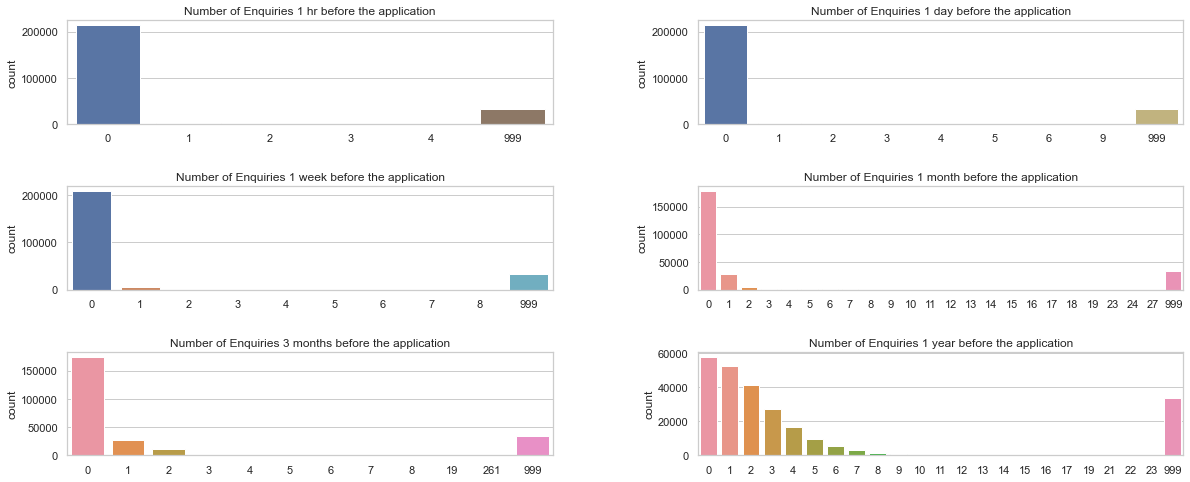

In [108]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace = 0.3, hspace=0.6)

# AMT_REQ_CREDIT_BUREAU_HOUR
plt.subplot(3,2,1)
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.xlabel('')
plt.title('Number of Enquiries 1 hr before the application') 

# AMT_REQ_CREDIT_BUREAU_DAY
plt.subplot(3,2,2)
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.xlabel('')
plt.title('Number of Enquiries 1 day before the application') 

# AMT_REQ_CREDIT_BUREAU_WEEK
plt.subplot(3,2,3)
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.xlabel('')
plt.title('Number of Enquiries 1 week before the application') 


# AMT_REQ_CREDIT_BUREAU_MON
plt.subplot(3,2,4)
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_MON'])
plt.xlabel('')
plt.title('Number of Enquiries 1 month before the application') 

# AMT_REQ_CREDIT_BUREAU_QRT
plt.subplot(3,2,5)
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.xlabel('')
plt.title('Number of Enquiries 3 months before the application') 


# AMT_REQ_CREDIT_BUREAU_YEAR
plt.subplot(3,2,6)
sns.countplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.xlabel('')
plt.title('Number of Enquiries 1 year before the application') 

plt.show()


# --------------------------------------------------------------------------------------------------------------------------
# (Ignore 999 -> MISSING VALUE HANDLING DONE ABOVE)
# --------------------------------------------------------------------------------------------------------------------------
# Enquiries 1 hr before, 1 day before => There were no enquiries (0) to the bureau about Majority of Clients
# 1 week before, 1 month before => There were a few Clients for whom 1 or 2 enquiries were conducted.
# 1 Year => Most of the Clients have 0 enquiries, but there are some clients with queries 1,2,and 3 in decreasing count fashion.

**NUM_EMI**

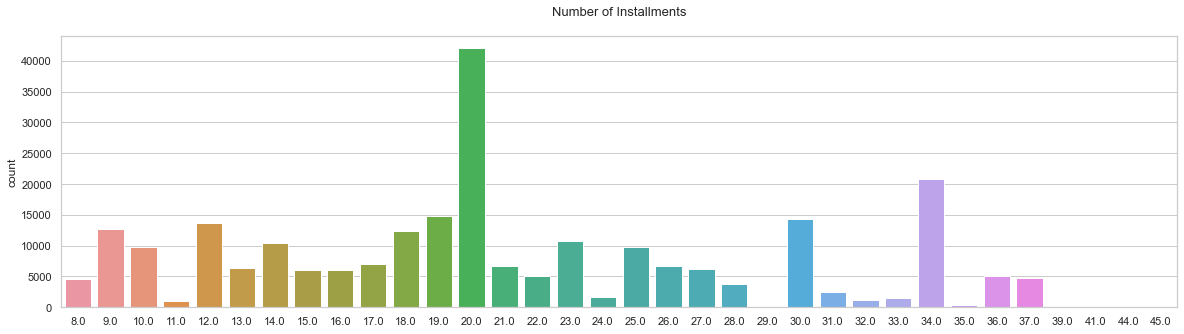

In [109]:
plt.figure(figsize=[20,5])
sns.countplot(df.NUM_EMI)
plt.title('Number of Installments\n',fontdict = {'fontsize': '13','fontweight': 5} )
plt.xlabel('')
plt.show()

# Most number of people have 20 Installments, followed by 19, 34, 30, 12 and 9 installments.

In [110]:
df.reset_index(inplace = True, drop = True)

## Bivariate Analysis and Multivariate Analysis

In [111]:
plt.style.use('default')
%matplotlib inline

In [112]:
sns.set_style("whitegrid")

**Age group vs Target**

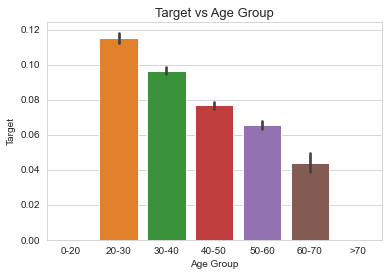

In [113]:
sns.barplot(df['AGE_GROUP'] , df['TARGET'])
plt.xlabel('Age Group')
plt.ylabel('Target')
plt.title('Target vs Age Group',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# 20-30 age group has high difficulties in repaying the loans as the target(mean) is max 
# This may be because at 20-30, people are looking for jobs and there is less financial stability.
# As the age increases from 30-40, 40-50, 50-60 and so on, the defaulting rate tends to decrease.

**Contract Type vs Target**

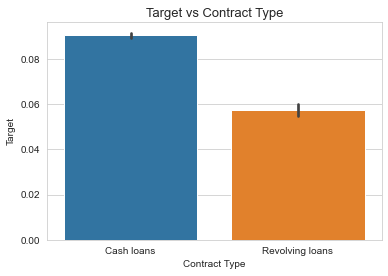

In [114]:
sns.barplot(x='NAME_CONTRACT_TYPE', y = 'TARGET', data = df)
plt.xlabel('Contract Type')
plt.ylabel('Target')
plt.title('Target vs Contract Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# People opting for Cash loans have more tendency to default as compared to people opting for Revolving Loans

**Target vs Education Level**

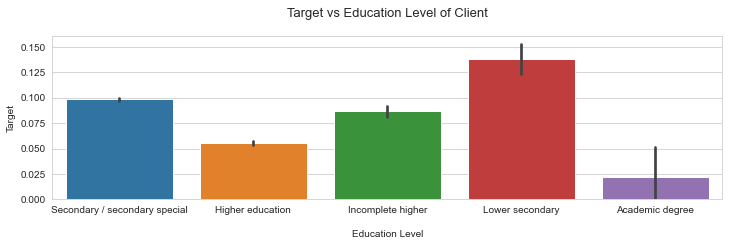

In [115]:
plt.figure(figsize=[12,3])
sns.barplot(x='NAME_EDUCATION_TYPE', y = 'TARGET', data = df)
plt.xlabel('\nEducation Level')
plt.ylabel('Target')
plt.title('Target vs Education Level of Client\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# People who have got Lower Secondary, Secondary / secondary special or Incomplete higher education are more likely to default as compared to Academic degree or higher education people.

**Target vs Housing Type**

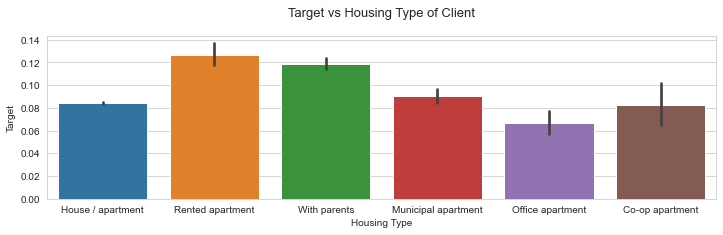

In [116]:
plt.figure(figsize=[12,3])
sns.barplot(x='NAME_HOUSING_TYPE', y = 'TARGET', data = df)
plt.xlabel('Housing Type')
plt.ylabel('Target')
plt.title('Target vs Housing Type of Client\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# People staying in Rented apartment or with parents have the maximum difficulties in paying loans.

**Housing Status vs Gender vs Target**

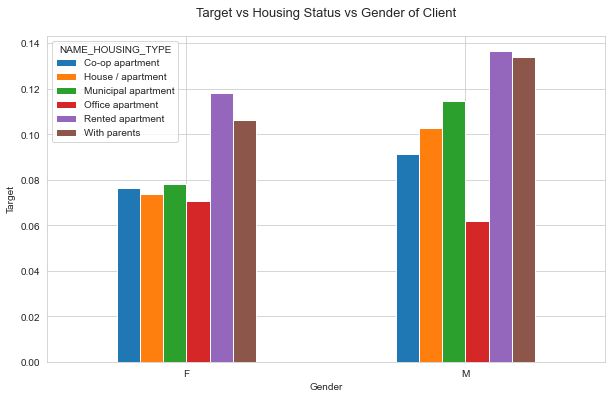

In [117]:
eduGender = pd.pivot_table(df, index='CODE_GENDER',columns=['NAME_HOUSING_TYPE'],values='TARGET', aggfunc=np.mean)
eduGender.plot(kind='bar',stacked=False, figsize=[10,6])
plt.xlabel('Gender')
plt.ylabel('Target')
plt.xticks(rotation = None)
plt.title('Target vs Housing Status vs Gender of Client\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Males have more difficulty repaying loans as comapred to females. 
# Females / Males living in Rented apartment, or with Parents have maximum defaulting tendency.
# Females / Males living in Office apartment have the least defaulting tendency.

**Education Level vs Family Status vs Target**

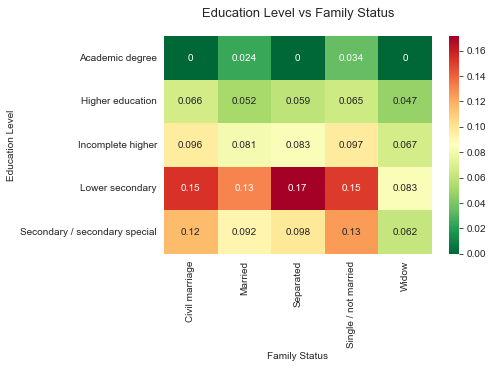

In [118]:
eduFam = pd.pivot_table(data= df, index='NAME_EDUCATION_TYPE',columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(eduFam , cmap = 'RdYlGn_r',annot = True)
plt.xlabel('Family Status')
plt.ylabel('Education Level')
plt.title('Education Level vs Family Status\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# People who have Academic Degree or Higher education for all Family Status are the best people to give loans to.
# Separated people or Single/ not married or Civil Marriage  with lower secondary education are the people with highest defaulting tendency.

**Target vs Occupation** 

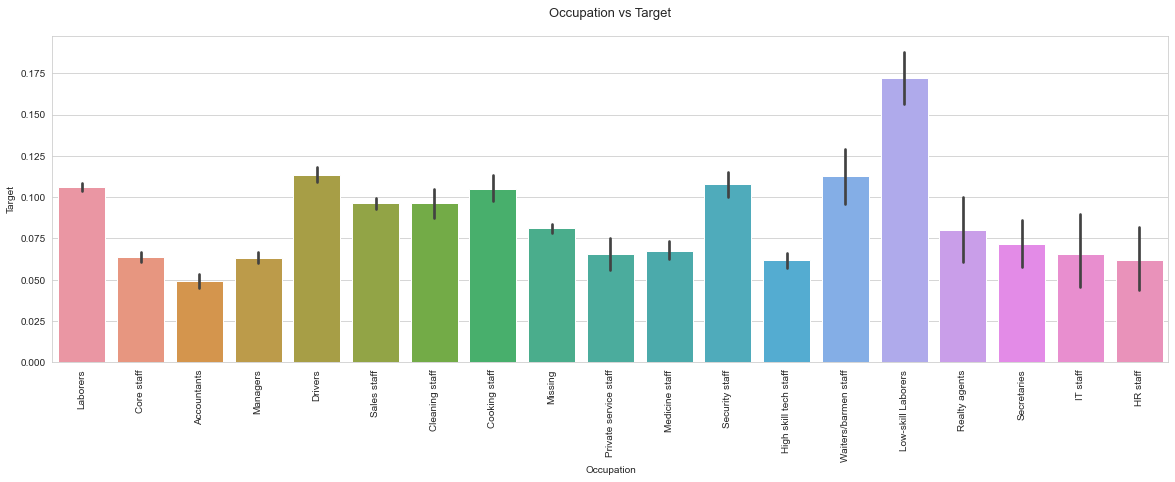

In [119]:
plt.figure(figsize=[20,6])
sns.barplot(x='OCCUPATION_TYPE', y = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Occupation')
plt.ylabel('Target')
plt.title('Occupation vs Target\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Low skill labourers,labourers waiters/ barmen staff, Security, Drivers and Cooking staff are the people who have difficulties in paying loans.
# Accountants, HR staff, IT Staff and High skill tech staff are the occupations that have people with least defaulting tendency.

**Target vs Organization Type** 

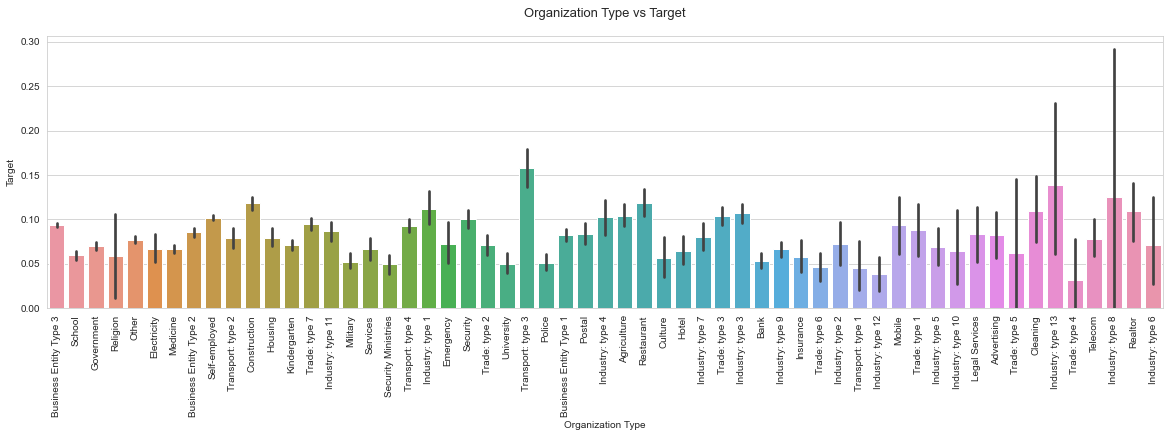

In [120]:
plt.figure(figsize=[20,5])
sns.barplot(x='ORGANIZATION_TYPE', y = 'TARGET', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Organization Type')
plt.ylabel('Target')
plt.title('Organization Type vs Target\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Transport type 3 and Industry type 13 are the worst Organization Type wrt to giving loans. These people may default.
# Trade: type 4, Trade: type 6, Trasport: type 1, Industry: type 12 are the best Organization Types to give loans.

**Target vs Family Status**

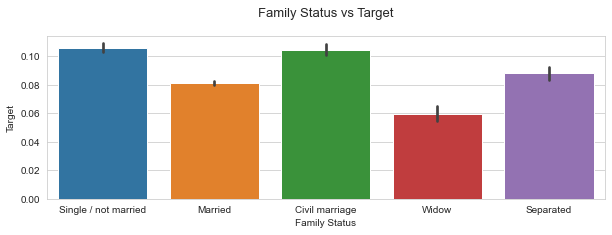

In [121]:
plt.figure(figsize=[10,3])
sns.barplot(x='NAME_FAMILY_STATUS', y = 'TARGET', data = df)
plt.xlabel('Family Status')
plt.ylabel('Target')
plt.title('Family Status vs Target\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# People who are Single/Not married, Civil Marriage are people who can default.
# Married and Widow are better segments for giving loans

**Family Status vs Housing Status vs Target**

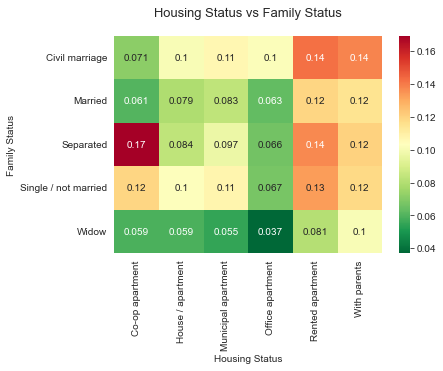

In [122]:
eduFam = pd.pivot_table(data= df, index='NAME_FAMILY_STATUS',columns='NAME_HOUSING_TYPE', values='TARGET')
sns.heatmap(eduFam , cmap = 'RdYlGn_r',annot = True)
plt.xlabel('Housing Status')
plt.ylabel('Family Status')
plt.title('Housing Status vs Family Status\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Separated - Co-op Apartment people and people staying in Rented apartments are the worst people for giving loans.
# Married people and Widows staying in Office, Co-op Apartment, House/apartment, or Municipal apartments are the best people for giving loans

**Region Population vs Housing Status vs Target**

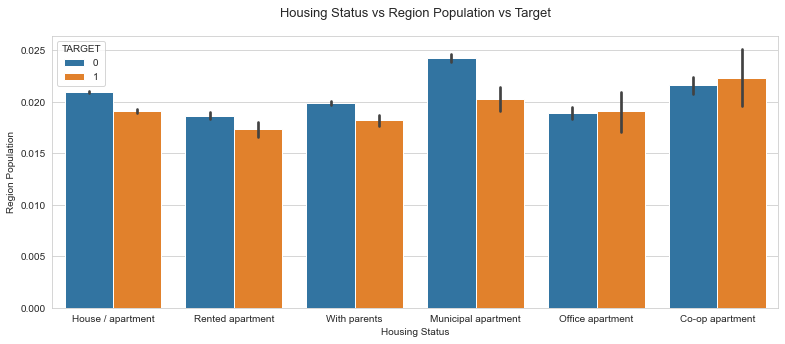

In [123]:
plt.figure(figsize=[13,5])
sns.barplot(x='NAME_HOUSING_TYPE', y = 'REGION_POPULATION_RELATIVE', data = df, hue='TARGET')
plt.xlabel('Housing Status')
plt.ylabel('Region Population')
plt.title('Housing Status vs Region Population vs Target\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# The Region Population for people staying in Municipal or Co-op apartment is little on the higher side than other housing types.
# Clients staying in Co-op apartments in highly populated region can default in future.

**Region Population vs Region Rating vs Target**

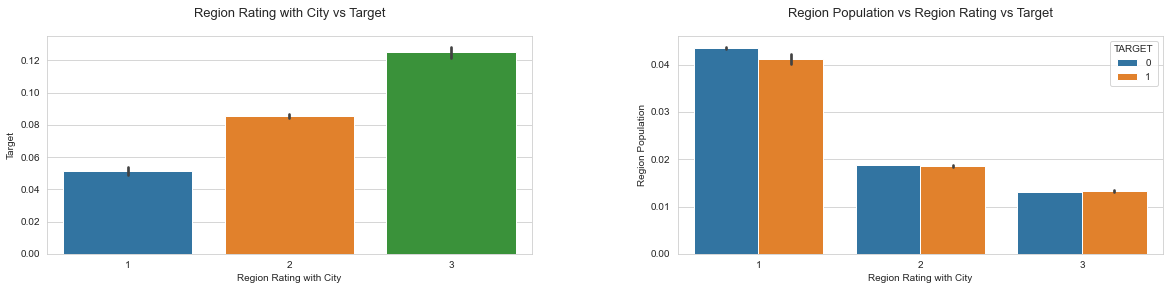

In [124]:
plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.6)

plt.subplot(1,2,1)
sns.barplot(x='REGION_RATING_CLIENT_W_CITY', y = 'TARGET', data = df)
plt.xlabel('Region Rating with City')
plt.ylabel('Target')
plt.title('Region Rating with City vs Target\n',fontdict = {'fontsize': '13','fontweight': 5})

plt.subplot(1,2,2)
sns.barplot(x='REGION_RATING_CLIENT_W_CITY', y = 'REGION_POPULATION_RELATIVE', hue='TARGET',data = df)
plt.xlabel('Region Rating with City')
plt.ylabel('Region Population')
plt.title('Region Population vs Region Rating vs Target\n',fontdict = {'fontsize': '13','fontweight': 5})

plt.show()

# As the Region rating increases, the defaulting tendency is also likely to increase.
# As the Region Rating increases, the Region Population decreases.
# The Region with high population has least Rating.

From above 2 plots, it can be said that may be 
- Regions with high Population and less Rating have less defaulters.
- Regions with Low Population and high Rating have more defaulters

**Total Income vs Target**

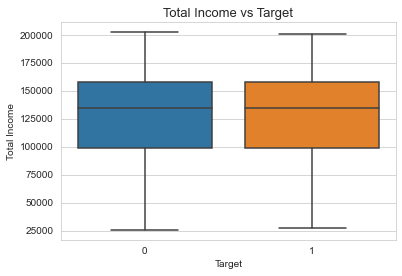

In [125]:
# As discussed above, in outlier handling, consider income data till 75th percentile 
income75 = df [ df.AMT_INCOME_TOTAL < df.AMT_INCOME_TOTAL.quantile(0.75) ]   
sns.boxplot( y = 'AMT_INCOME_TOTAL' ,x = 'TARGET', data = income75)
plt.xlabel('Target')
plt.ylabel('Total Income')
plt.title('Total Income vs Target',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# In terms of Total Income, there is no major difference in defaulter and non-defaulters.

**Total Income vs Education vs Gender**

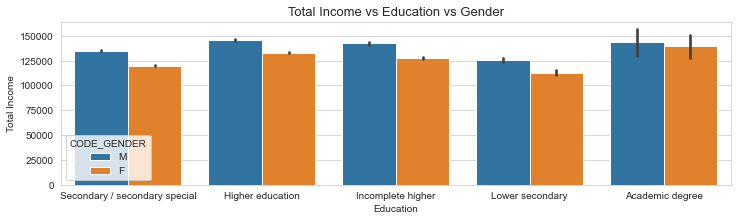

In [126]:
plt.figure(figsize=[12,3])
sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', data=income75, hue='CODE_GENDER')
plt.xlabel('Education')
plt.ylabel('Total Income')
plt.title('Total Income vs Education vs Gender',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Males tend to have higher income for all the education levels. 
# The difference in Incomes of Males and Females in Academic Degree is least

**Total Income vs Credit Amount**

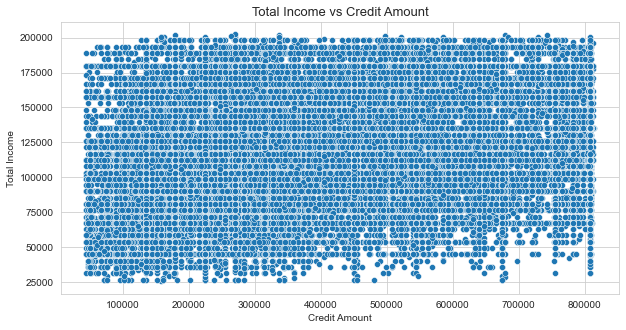

In [127]:
plt.figure(figsize=[10,5])

# As discussed above, in outlier handling, consider income data and credit data till 75th percentile 
data75 = df [ (df.AMT_INCOME_TOTAL < df.AMT_INCOME_TOTAL.quantile(0.75))  & (df.AMT_CREDIT < df.AMT_CREDIT.quantile(0.75)) ]  
sns.scatterplot( y = 'AMT_INCOME_TOTAL' ,x = 'AMT_CREDIT', data = data75)
plt.xlabel('Credit Amount')
plt.ylabel('Total Income')
plt.title('Total Income vs Credit Amount',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# There are points all over the place. No major pattern between Income and Credit Amount

**Goods Price vs Credit Amount**

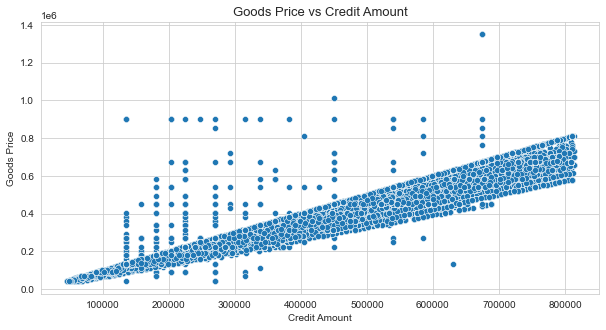

In [128]:
plt.figure(figsize=[10,5])
# As discussed above, in outlier handling, consider credit data till 75th percentile 
credit75 = df [ df.AMT_CREDIT < df.AMT_CREDIT.quantile(0.75) ]   
sns.scatterplot( y = 'AMT_GOODS_PRICE' ,x = 'AMT_CREDIT', data = credit75)
plt.xlabel('Credit Amount')
plt.ylabel('Goods Price')
plt.title('Goods Price vs Credit Amount',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# As the price of Goods increases, the credit amount also increases. 
# This makes sense because if the client want to purchase an expensive good/product, the credit amount (loan amount) will also be more

**Goods Price vs Annuity Amount**

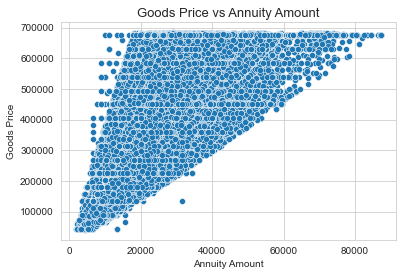

In [129]:
# As discussed above, in outlier handling, consider goods price data till 75th percentile 
goodPrice75 = df [ df.AMT_GOODS_PRICE < df.AMT_GOODS_PRICE.quantile(0.75) ]   
sns.scatterplot( y = 'AMT_GOODS_PRICE' ,x = 'AMT_ANNUITY', data = goodPrice75)
plt.xlabel('Annuity Amount')
plt.ylabel('Goods Price')
plt.title('Goods Price vs Annuity Amount',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# As the price of Goods increases, the annuity amount (installment amount of loan) also increases. 

**Total Income vs Credit Amount vs Annuity Amount vs Goods Price**

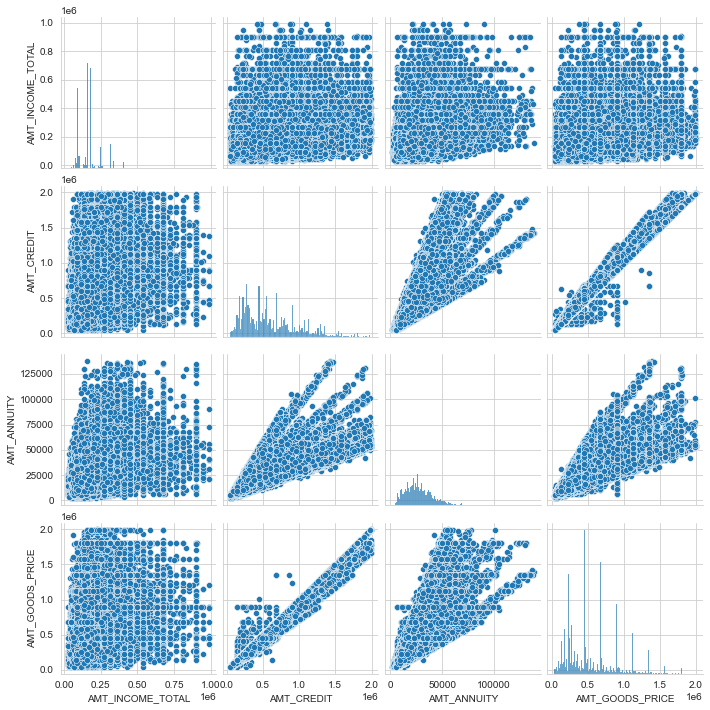

In [130]:
sns.pairplot(df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']],)
plt.show()

# Credit Amount, Annuity Amount and Goods Price, all 3 of them have a positive trend with each other.

**Number of EMI vs Credit Amount vs Target**

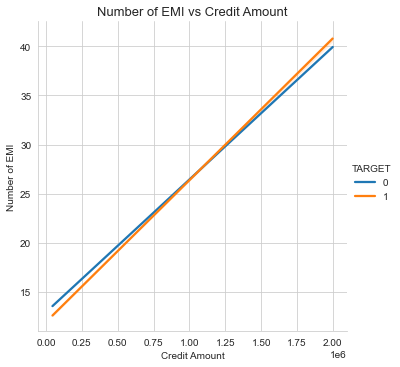

In [131]:
sns.lmplot(x = 'AMT_CREDIT', y = 'NUM_EMI', data = df, hue = 'TARGET', scatter=False)
plt.xlabel('Credit Amount')
plt.ylabel('Number of EMI')
plt.title('Number of EMI vs Credit Amount',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# As the Credit Amount increases, the number of EMI's also increase for both Target 0 and Target 1.

**Contract type vs Total Income vs Target**

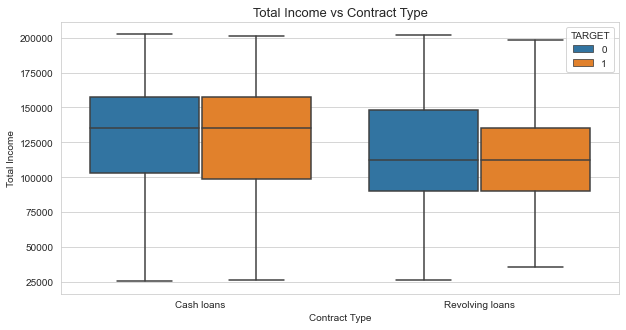

In [132]:
plt.figure(figsize=[10,5])
sns.boxplot( y = 'AMT_INCOME_TOTAL', x = 'NAME_CONTRACT_TYPE' ,hue = 'TARGET', order = ['Cash loans','Revolving loans'], data = income75)
plt.xlabel('Contract Type')
plt.ylabel('Total Income')
plt.title('Total Income vs Contract Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Cash loans: The income distribution for people applying for both defaulter and non-defaulter is similar.
# Revolving loans: 75% of the people who opted for Revolving loans have less income as compared to 75% of Cash loan clients. 
#                  Defaulter have less income and less IQR wrt to Non defaulters. 

**Contract type vs Credit Amount vs Target**

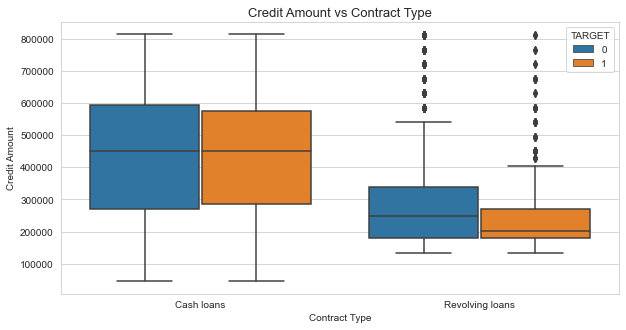

In [133]:
plt.figure(figsize=[10,5])
sns.boxplot( y = 'AMT_CREDIT', x = 'NAME_CONTRACT_TYPE' ,hue = 'TARGET', data = credit75)
plt.xlabel('Contract Type')
plt.ylabel('Credit Amount')
plt.title('Credit Amount vs Contract Type',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()


- The Credit amount for Cash loans is much higher than Revolving loans.
- For Revolving loans, the defaulters have IQR almost half of the IQR of Non-defaulters. The credit amount upper limit is much lower for Defaulters wrt to Non-defaulters.
- Defaulters have less credit amount relative to Non-defaulters for Revolving Loans

**Car/ House Ownership vs Target**

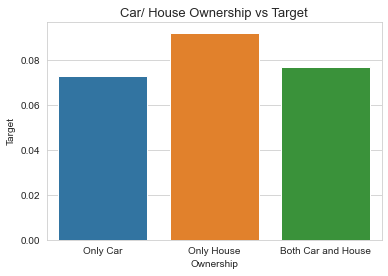

In [134]:
# Mean of Target for clients owning a car
car = df [ (df['FLAG_OWN_CAR'] == 'Y') & ( df['FLAG_OWN_REALTY'] == 'N')].TARGET.mean()
# Mean of Target for clients owning a house
house = df [ (df['FLAG_OWN_CAR'] == 'N') & ( df['FLAG_OWN_REALTY'] == 'Y')].TARGET.mean()
# Mean of Target for clients owning both car and house
carHouse = df [ (df['FLAG_OWN_CAR'] == 'Y') & ( df['FLAG_OWN_REALTY'] == 'Y')].TARGET.mean()

sns.barplot(x=['Only Car','Only House','Both Car and House'], y=[car, house, carHouse],data = df)
plt.xlabel('Ownership')
plt.ylabel('Target')
plt.title('Car/ House Ownership vs Target',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# Clients owning 'Only a house', may have high chances of defaulting.

**Count of Family Members vs Target**

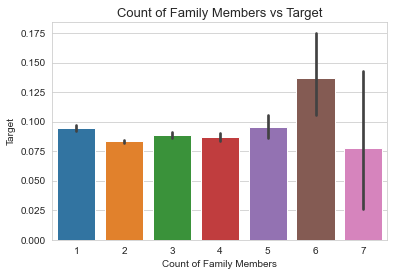

In [135]:
sns.barplot(x='CNT_FAM_MEMBERS', y = 'TARGET', data = df)
plt.xlabel('Count of Family Members')
plt.ylabel('Target')
plt.title('Count of Family Members vs Target',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# People with more number of Family Members may have high defaulting tendency. 
# Excluding the case for 1 Family Member, as the count of Family members increases till 6, the defaulting chances also increase.

**Count of Children vs Target**

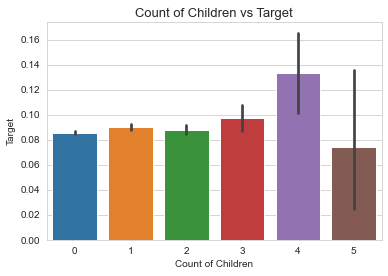

In [136]:
sns.barplot(x='CNT_CHILDREN', y = 'TARGET', data = df)
plt.xlabel('Count of Children')
plt.ylabel('Target')
plt.title('Count of Children vs Target',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# People with more number of Children may have high defaulting tendency. 
# As the count of Children increases till 4, the defaulting chances also increase.

**Correlation Heatmap**

**YEARS_LAST_PHONE_CHANGE , YEARS_EMPLOYED , YEARS_REGISTRATION, YEARS_ID_PUBLISH vs TARGET**

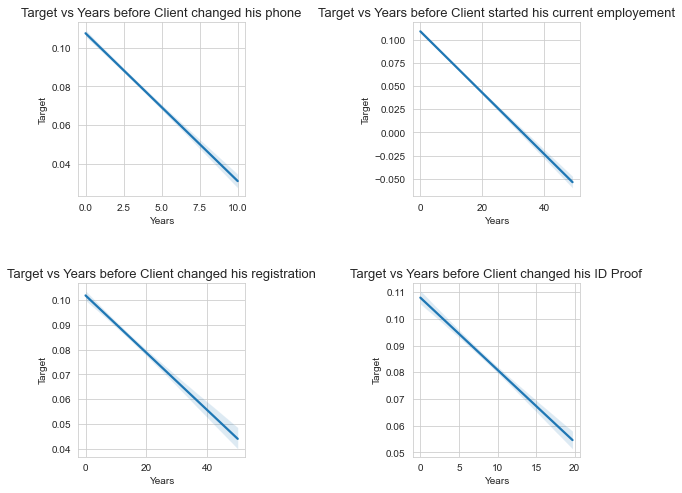

In [137]:
plt.figure(figsize=[9,8])
plt.subplots_adjust(wspace = 1, hspace=0.5)
plt.subplot(2,2,1)
sns.regplot(df.YEARS_LAST_PHONE_CHANGE, df.TARGET, scatter=False)
plt.ylabel('Target')
plt.xlabel('Years')
plt.title('Target vs Years before Client changed his phone',fontdict = {'fontsize': '13','fontweight': 5})

plt.subplot(2,2,2)
sns.regplot( df.YEARS_EMPLOYED,df.TARGET, scatter=False)
plt.ylabel('Target')
plt.xlabel('Years')
plt.title('Target vs Years before Client started his current employement',fontdict = {'fontsize': '13','fontweight': 5})

plt.subplot(2,2,3)
sns.regplot( df.YEARS_REGISTRATION, df.TARGET,scatter=False)
plt.ylabel('Target')
plt.xlabel('Years')
plt.title('Target vs Years before Client changed his registration',fontdict = {'fontsize': '13','fontweight': 5})

plt.subplot(2,2,4)
sns.regplot(df.YEARS_ID_PUBLISH, df.TARGET, scatter=False)
plt.ylabel('Target')
plt.xlabel('Years')
plt.title('Target vs Years before Client changed his ID Proof',fontdict = {'fontsize': '13','fontweight': 5})

plt.show()

# The Clients who changed their ID or phone or registration or employment recenly have more defaulting chances as they have high target value.

**Target vs Number of EMI**

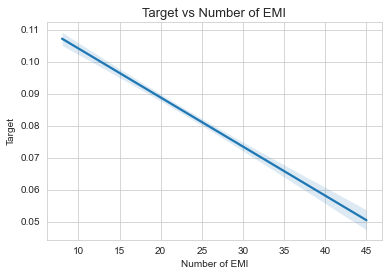

In [138]:
sns.regplot(df.NUM_EMI, df.TARGET, scatter=False)
plt.ylabel('Target')
plt.xlabel('Number of EMI')
plt.title('Target vs Number of EMI',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

**Document provided vs Target**

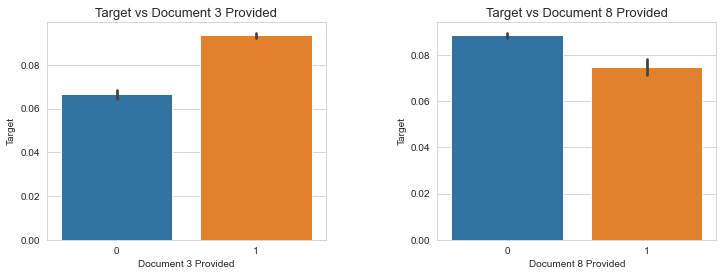

In [139]:
plt.figure(figsize=[12,4])
plt.subplots_adjust(wspace = 0.4, hspace=0.1)

plt.subplot(1,2,1)
sns.barplot(x = 'FLAG_DOCUMENT_3', y = 'TARGET', data= df)
plt.xlabel('Document 3 Provided')
plt.ylabel('Target')
plt.title('Target vs Document 3 Provided',fontdict = {'fontsize': '13','fontweight': 5})

plt.subplot(1,2,2)
sns.barplot(x = 'FLAG_DOCUMENT_8', y = 'TARGET', data= df)
plt.xlabel('Document 8 Provided')
plt.ylabel('Target')
plt.title('Target vs Document 8 Provided',fontdict = {'fontsize': '13','fontweight': 5})

plt.show()

# Assuming:  0 means 'Did not provide the Document' and 1 means 'Provided the document'
# Clients who provided Document 3 have more defaulting tendency
# Clients who did not provide Document 8 have more defaulting tendency
# Thus, nothing can be concluded about defaulting chances irrespective of whether the documents are provided or not

# From the above, correlation matrix, we know that FLAG_DOCUMENT_3 and FLAG_DOCUMENT_8 have a very high negative correlation

**Target vs Number of Enquires about a Client**

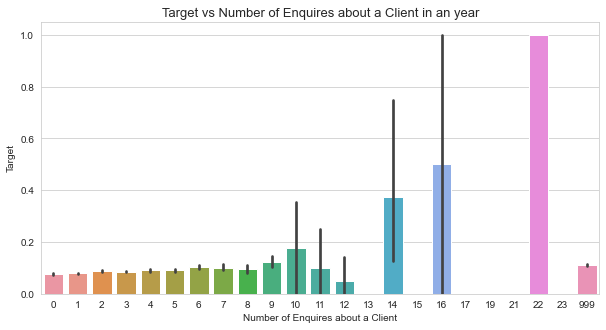

In [140]:
plt.figure(figsize=[10,5])
sns.barplot(x = 'AMT_REQ_CREDIT_BUREAU_YEAR', y = 'TARGET', data= df)
plt.xlabel('Number of Enquires about a Client')
plt.ylabel('Target')
plt.title('Target vs Number of Enquires about a Client in an year',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# As the number of Enquiries about a client increase, the client is more likely to default.

**Target vs Number of observations of Client's Social Surroundings that defauted past in 30 days**

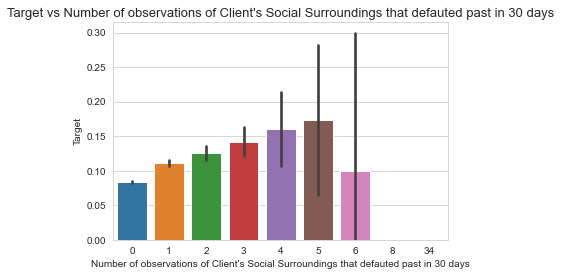

In [141]:
sns.barplot(x = 'DEF_30_CNT_SOCIAL_CIRCLE', y = 'TARGET', data= df)
plt.xlabel('Number of observations of Client\'s Social Surroundings that defauted past in 30 days')
plt.ylabel('Target')
plt.title('Target vs Number of observations of Client\'s Social Surroundings that defauted past in 30 days',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

# As the number of observations of Clients social surrondings that defaulted in past 30 days increases, the client is more likely to default.

**Correlation Heatmap**

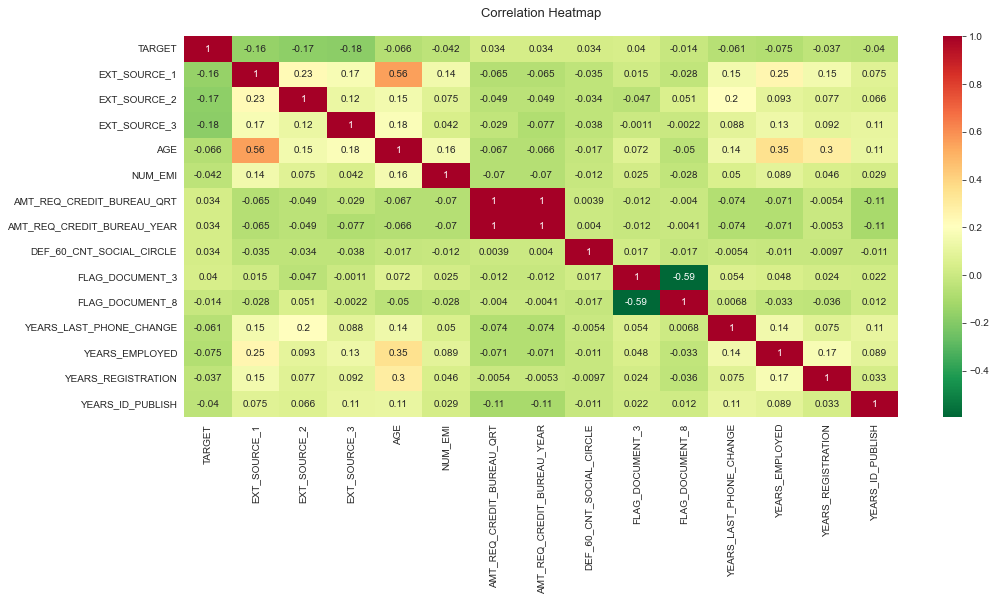

In [142]:
plt.figure(figsize=[16,7])
externalSources = df[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AGE','NUM_EMI',
                      'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','DEF_60_CNT_SOCIAL_CIRCLE',
                      'FLAG_DOCUMENT_3','FLAG_DOCUMENT_8','YEARS_LAST_PHONE_CHANGE','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']].corr()
sns.heatmap(externalSources, cmap = 'RdYlGn_r', annot = True)
plt.title('Correlation Heatmap\n',fontdict = {'fontsize': '13','fontweight': 5})
plt.show()

### Correlations wrt TARGET
1. TARGET has negative correlation with all 3 external sources.
2. It has a negative correlation with AGE indicating that as the age increases, the target (defaulting tendency) decreases 
3. It has a negative correlation with YEARS_LAST_PHONE_CHANGE meaning that if the phone is changed recently, the defaulting tendency increases.
4. It has negative correlation with NUM_EMI 
5. It has positive correlation with AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR and DEF_60_CNT_SOCIAL_CIRCLE

### Other Correlations
6. AGE and EXT_SOURCE_1 have a very high positive correlation
7. AGE and YEARS_EMPLOYED have a high positive correlation with YEARS_EMPLOYED and YEARS_REGISTRATION. As the age increases, the Years Employed and Years registered also increase
8. EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3, all 3 of them have a very high negative correlation with Target
9. FLAG_DOCUMENT_3 and FLAG_DOCUMENT_8 have a very high negative correlation with each other.
10. YEARS_ID_PUBLISH is negatively correlated to AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR. It means that if the ID is changed recently, there are likely to be more enquiries. For clients, who changed their IDs long back, the number of enquiries will be less.

#### (From Bivariate and Multivariate analysis section) 
11. REGION_POPULATION_RELATIVE is negatively correlated to REGION_RATING_CLIENT_W_CITY. Regions with high Population have less Region Rating.
12. AMT_CREDIT, AMT_ANNUITY,AMT_GOODS_PRICE have a high positive correlation with each other.